📌 Introduction

Understanding crime patterns over time is essential for improving public safety, guiding policy decisions, and optimizing resource allocation for law-enforcement agencies. The Crime Data from 2020 to November 2025 dataset provides a comprehensive multi-year record of criminal incidents, capturing a wide range of attributes such as crime categories, dates, locations, and contextual factors.

This project aims to apply a complete Data Science workflow to analyze, visualize, and model crime trends across this period. By following a step-by-step approach—from raw data exploration to advanced analytics—the project will identify hidden patterns, seasonal behaviors, high-risk locations, and potential predictive signals.

The primary goals of this analysis include:

Understanding long-term and short-term crime trends

Exploring geographic and temporal patterns

Identifying factors associated with high-incident periods or locations

Preparing clean and structured data for modeling

Building baseline predictive models for crime forecasting

Producing interpretable visualizations and reports

This repository is designed as a structured and modular Data Science project, with English-only code, notebooks, and documentation to ensure clarity, reproducibility, and easy deployment on GitHub.

Step 1 — Import Required Libraries & Load the Dataset

In this step, we begin by importing the essential Python libraries used for data manipulation, visualization, and exploratory analysis:

pandas for handling tabular data

matplotlib and seaborn for visualizations

warnings to suppress unnecessary warning messages

After importing the libraries, we load the crime dataset from the project directory using pandas.read_csv() and display the first few rows with df.head(). This helps verify that the file was read correctly and gives a quick preview of the dataset’s structure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('E:/Data science/projects/Crime_Data_from_2020_to_Nov2025/data/Crime_Data_from_2020_to_Present.csv')
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,occ_year,occ_month,occ_date,occ_day
0,211507896,2021-04-11 00:00:00.000000000,2020-11-07 00:00:00.000000000,1970-01-01 08:45:00.000000,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,7800 BEEMAN AV,34.2124,-118.4092,2020,Nov,7,Sat
1,201516622,2020-10-21 00:00:00.000000000,2020-10-18 00:00:00.000000000,1970-01-01 18:45:00.000000,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230,ATOLL AV,34.1993,-118.4203,2020,Oct,18,Sun
2,240913563,2024-12-10 00:00:00.000000000,2020-10-30 00:00:00.000000000,1970-01-01 12:40:00.000000,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,14600 SYLVAN ST,34.1847,-118.4509,2020,Oct,30,Fri
3,210704711,2020-12-24 00:00:00.000000000,2020-12-24 00:00:00.000000000,1970-01-01 13:10:00.000000,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331,6000 COMEY AV,34.0339,-118.3747,2020,Dec,24,Thu
4,201418201,2020-10-03 00:00:00.000000000,2020-09-29 00:00:00.000000000,1970-01-01 18:30:00.000000,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420,4700 LA VILLA MARINA,33.9813,-118.4350,2020,Sep,29,Tue


In [4]:
df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
occ_year          0
occ_month         0
occ_date          0
occ_day           0
dtype: int64

In [5]:
print(f'number of rows: {df.shape[0]}\n number of columns: {df.shape[1]}')

number of rows: 1004991
 number of columns: 28


📊 Step 2 — Visualizing Yearly Crime Distribution

To understand long-term crime trends, we begin by aggregating the dataset by occurrence year (occ_year) and counting the number of reported incidents per year. This allows us to quickly identify whether crime levels have increased, decreased, or remained stable over time.

We then create a line plot using Seaborn to visualize the yearly distribution of crime incidents. The plot includes:

A clean white-grid theme for readability

Markers on each data point for easier trend interpretation

Labels and titles for clarity

Value annotations directly above each point

This visualization helps reveal long-term trends and provides an initial understanding of how crime patterns evolve across the years.

Yearly Crime Distribution

In [6]:
plot1=df.groupby('occ_year').size().reset_index(name='count')
plot1

,occ_year,count
0,2020,199847
1,2021,209876
2,2022,235259
3,2023,232345
4,2024,127567
5,2025,97


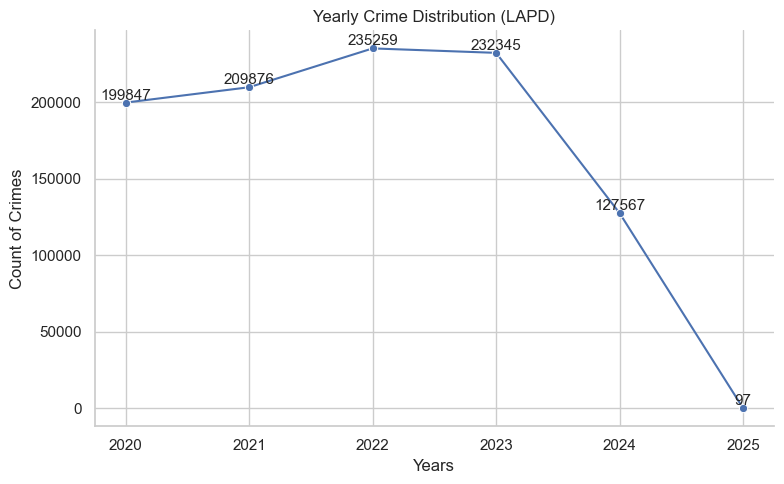

In [7]:
plot1=df.groupby('occ_year').size().reset_index(name='count')
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,5))
ax=sns.lineplot(data=plot1,x='occ_year',y='count',marker='o')

plt.xlabel('Years')
plt.ylabel('Count of Crimes')
plt.title('Yearly Crime Distribution (LAPD)')

[plt.text(x, y, int(y), ha='center', va='bottom', fontsize=11) for x, y in zip(plot1['occ_year'], plot1['count'])]

sns.despine()
plt.tight_layout()
plt.show()

Month-wise Crime Volume

In [8]:
df['occ_month']=pd.Categorical(df['occ_month'],
                               categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                ordered=True)

plot2=df.groupby('occ_month',observed=True).size().reset_index(name='count')
plot2


,occ_month,count
0,Jan,92701
1,Feb,86401
2,Mar,87818
3,Apr,83518
4,May,83013
5,Jun,81382
6,Jul,83962
7,Aug,83850
8,Sep,81015
9,Oct,84127


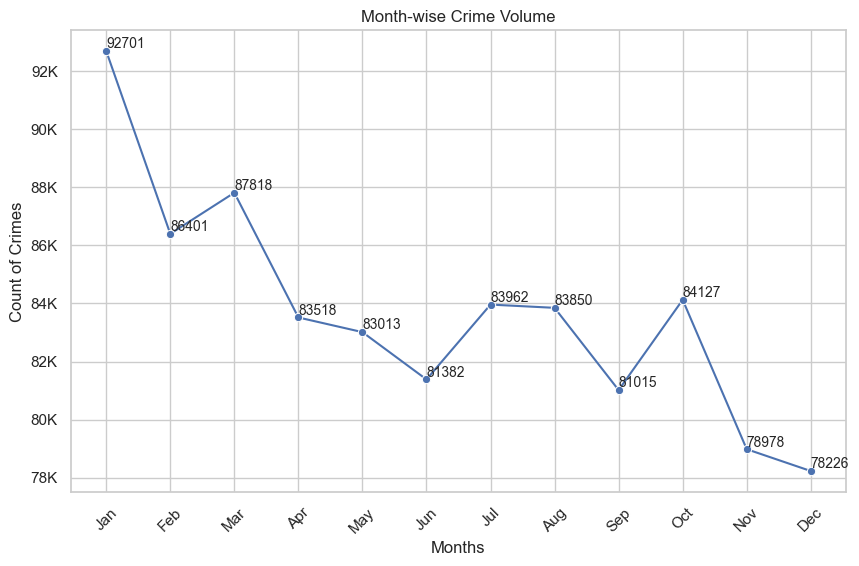

In [9]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot2,x='occ_month',y='count',marker='o')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.xlabel('Months')
plt.ylabel('Count of Crimes')
plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Month-wise Crime Volume')

[plt.text(x,y,int(y),rotation=0,va='bottom',fontsize=10) for x,y in zip(plot2['occ_month'],plot2['count'])]
plt.show()

Day of Week and Hourly Crime Trends

In [10]:
df['occ_day']=pd.Categorical(
    df['occ_day'],
    categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    ordered=True
)
plot3=df.groupby('occ_day',observed=True).size().reset_index(name='count')
plot3

,occ_day,count
0,Mon,141543
1,Tue,138141
2,Wed,142714
3,Thu,141810
4,Fri,153676
5,Sat,147459
6,Sun,139648


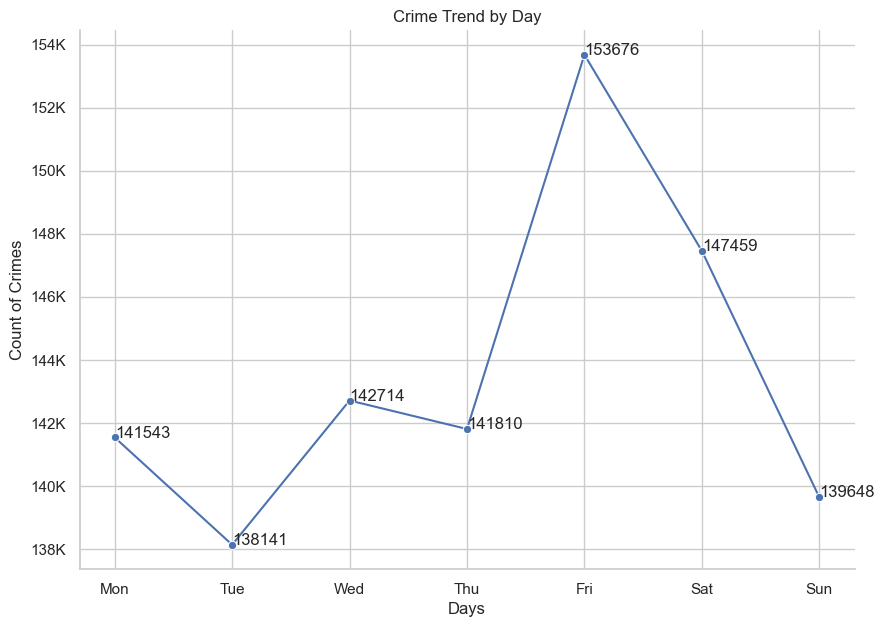

In [11]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot3,x='occ_day',y='count',marker='o')
plt.xlabel('Days')
plt.ylabel('Count of Crimes')
plt.title('Crime Trend by Day')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

[plt.text(x,y,int(y),ha='left') for x,y in zip(plot3['occ_day'],plot3['count'])]
sns.despine()
plt.show()

In [12]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], errors='coerce')
df['hour'] = df['TIME OCC'].dt.hour

bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['Late Night(0-6)', 'Morning Rush(6-10)', 'Midday(10-14)', 'Afternoon(14-18)', 'Evening Rush(18-22)', 'Late Evening(22-24)']

df['time_buck']=pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

In [13]:
plot4=df.groupby('time_buck',observed=True).size().reset_index(name='count')
plot4

,time_buck,count
0,Late Night(0-6),153681
1,Morning Rush(6-10),123225
2,Midday(10-14),200093
3,Afternoon(14-18),213912
4,Evening Rush(18-22),222698
5,Late Evening(22-24),91382


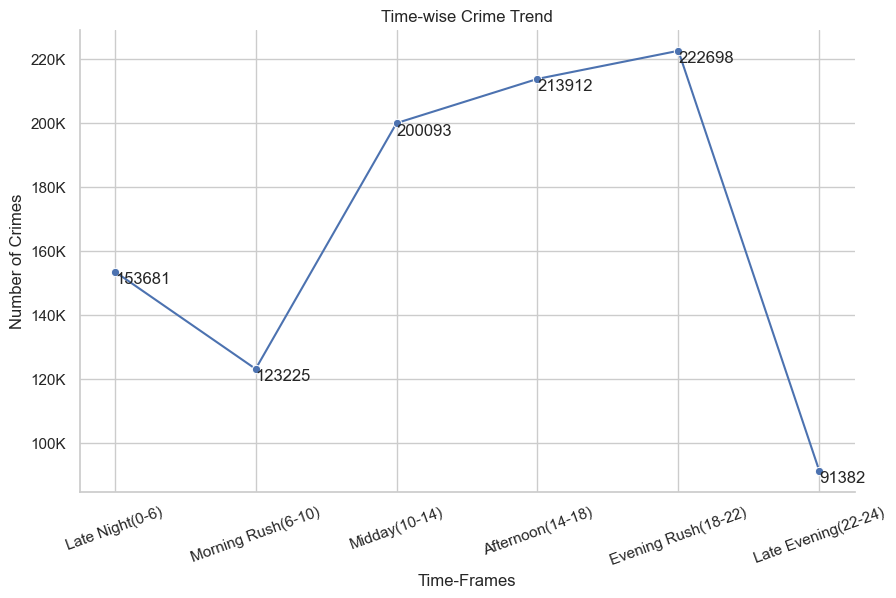

In [14]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot4,x='time_buck',y='count',marker='o')
plt.xlabel('Time-Frames')
plt.ylabel('Number of Crimes')
plt.title('Time-wise Crime Trend')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.setp(ax.get_xticklabels(),rotation=20,ha='center')

[plt.text(x,y,int(y),ha='left',va='top',rotation=0) for x,y in zip(plot4['time_buck'],plot4['count'])]

sns.despine()
plt.show()

Reporting Delay (Date Occurred vs Date Reported)

In [15]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['delay_reporting']=(df['Date Rptd'] - df['DATE OCC']).dt.days

In [16]:
bins=[-1,0,3,7,30,90,365,float('inf')]
labels=[
    'same day',
    '1–3 days',
    '4–7 days',
    '8–30 days',
    '31–90 days',
    '91–365 days',
    '>365 days'
]

df['rep_lag']=pd.cut(df['delay_reporting'],bins=bins,labels=labels)

In [17]:
plot5=df.groupby('rep_lag',observed=True).size().reset_index(name='count')
plot5

,rep_lag,count
0,same day,482066
1,1–3 days,324370
2,4–7 days,66416
3,8–30 days,73116
4,31–90 days,31564
5,91–365 days,19936
6,>365 days,7523


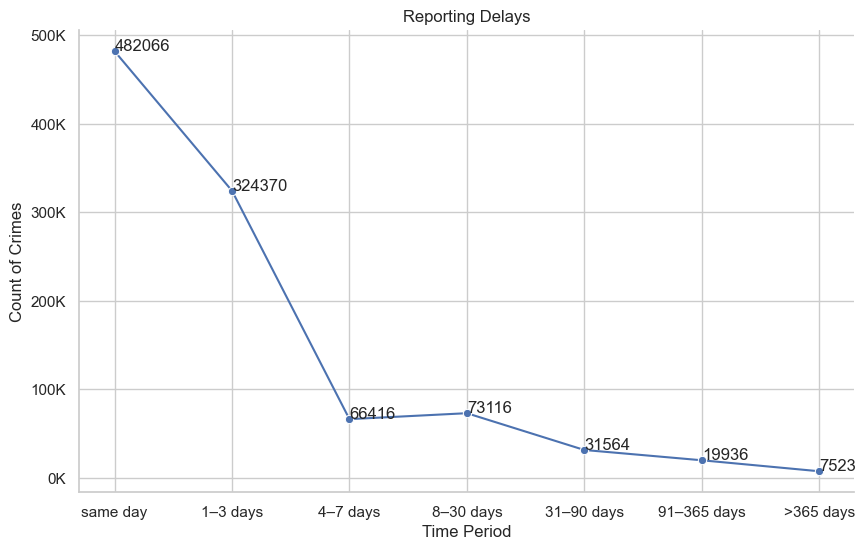

In [18]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot5,x='rep_lag',y='count',marker='o')
plt.xlabel('Time Period')
plt.ylabel('Count of Crimes')
plt.title('Reporting Delays')

[plt.text(x,y,int(y),ha='left') for x,y in zip(plot5['rep_lag'],plot5['count'])]
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

sns.despine()
plt.show()

Top 10 Most Frequent Crime Categories

In [19]:
plot6=df.groupby('Crm Cd Desc').size().sort_values(ascending=False).reset_index(name='count').head(10)
plot6

,Crm Cd Desc,count
0,VEHICLE - STOLEN,115190
1,BATTERY - SIMPLE ASSAULT,74839
2,BURGLARY FROM VEHICLE,63517
3,THEFT OF IDENTITY,62537
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61092
5,BURGLARY,57871
6,THEFT PLAIN - PETTY ($950 & UNDER),53717
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525
8,INTIMATE PARTNER - SIMPLE ASSAULT,46712
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314


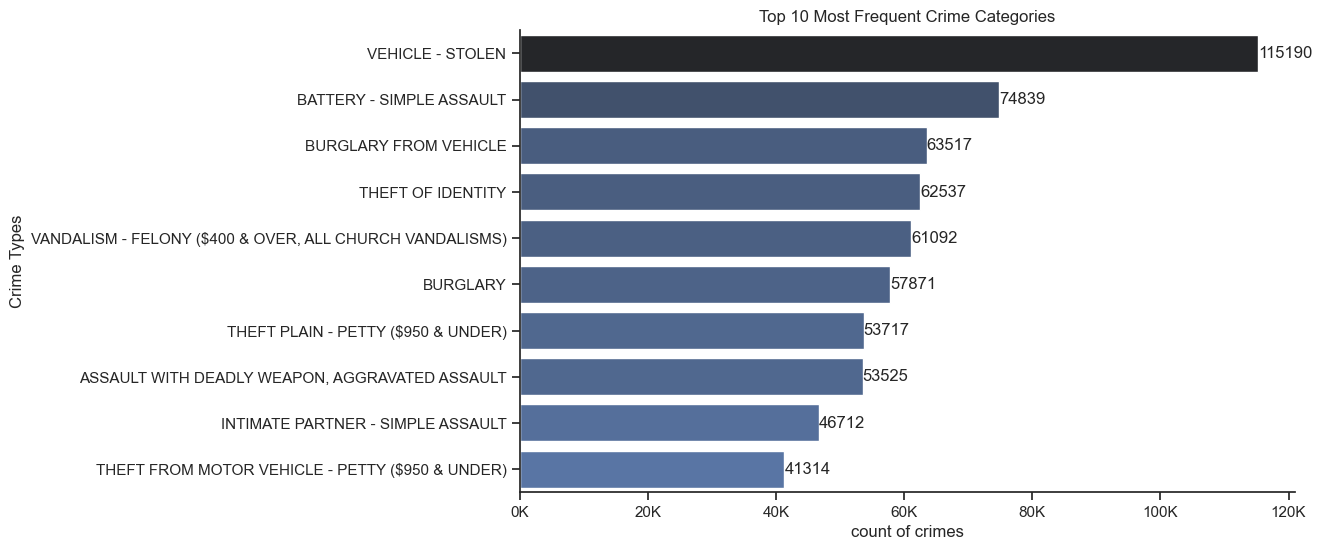

In [20]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot6,x='count',y='Crm Cd Desc',hue='count',palette='dark:b_r')
plt.xlabel('count of crimes')
plt.ylabel('Crime Types')
plt.title('Top 10 Most Frequent Crime Categories')
ax.legend_.remove()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

Part 1 vs Part 2 Crime Comparison

In [21]:
plot7=df.groupby('Part 1-2').size().reset_index(name='count')
plot7

,Part 1-2,count
0,1,602645
1,2,402346


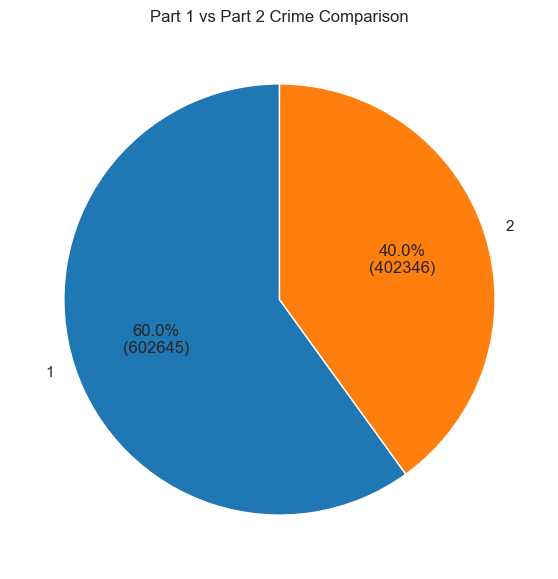

In [22]:
plt.figure(figsize=(7,7))
sns.set_theme(style='ticks')

plt.pie(
    plot7['count'],
    labels=plot7['Part 1-2'],
    autopct=lambda p: f'{p:.1f}%\n({p*sum(plot7['count'])/100:.0f})',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.tab10.colors)

plt.title('Part 1 vs Part 2 Crime Comparison')
plt.show()

Area-wise Crime Distribution

In [23]:
plot8=df.groupby('AREA NAME').size().sort_values(ascending=True).reset_index(name='count')
plot8

,AREA NAME,count
0,Foothill,33133
1,Hollenbeck,37085
2,Mission,40351
3,Topanga,41374
4,Harbor,41394
5,Devonshire,41756
6,West Valley,42156
7,Van Nuys,42883
8,Northeast,42963
9,West LA,45729


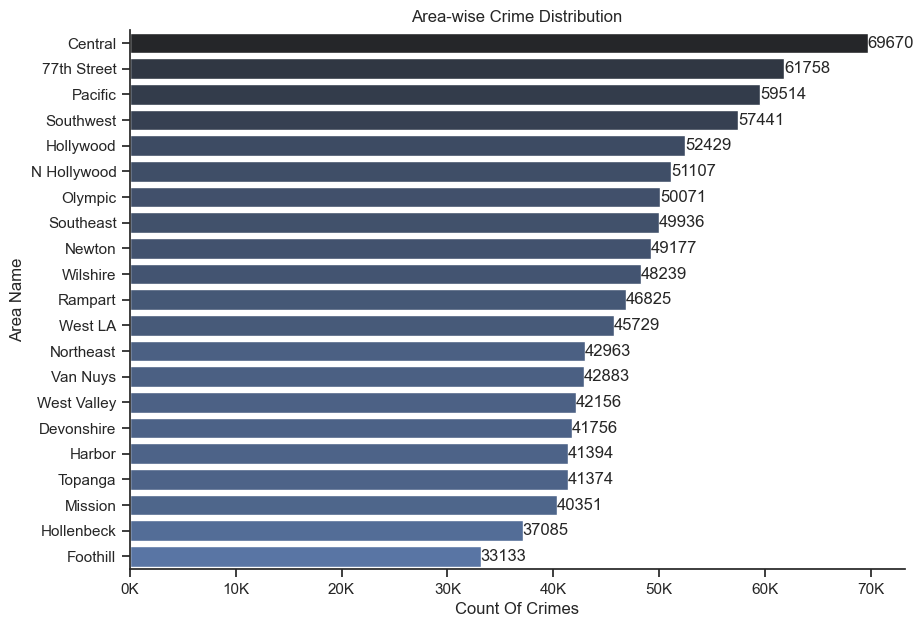

In [24]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=plot8,x='count',y='AREA NAME',hue='count',palette='dark:b_r')
ax.invert_yaxis()
plt.xlabel('Count Of Crimes')
plt.ylabel('Area Name')
plt.title('Area-wise Crime Distribution')
ax.legend_.remove()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

Crime Trend Over Years by Area

In [25]:
plot9=df.groupby('occ_year')['AREA NAME'].value_counts().reset_index(name='count')
plot9

,occ_year,AREA NAME,count
0,2020,77th Street,13353
1,2020,Central,11604
2,2020,Pacific,11576
3,2020,Southwest,11180
4,2020,Southeast,10849
...,...,...,...
120,2025,Wilshire,2
121,2025,N Hollywood,1
122,2025,Olympic,1
123,2025,Pacific,1


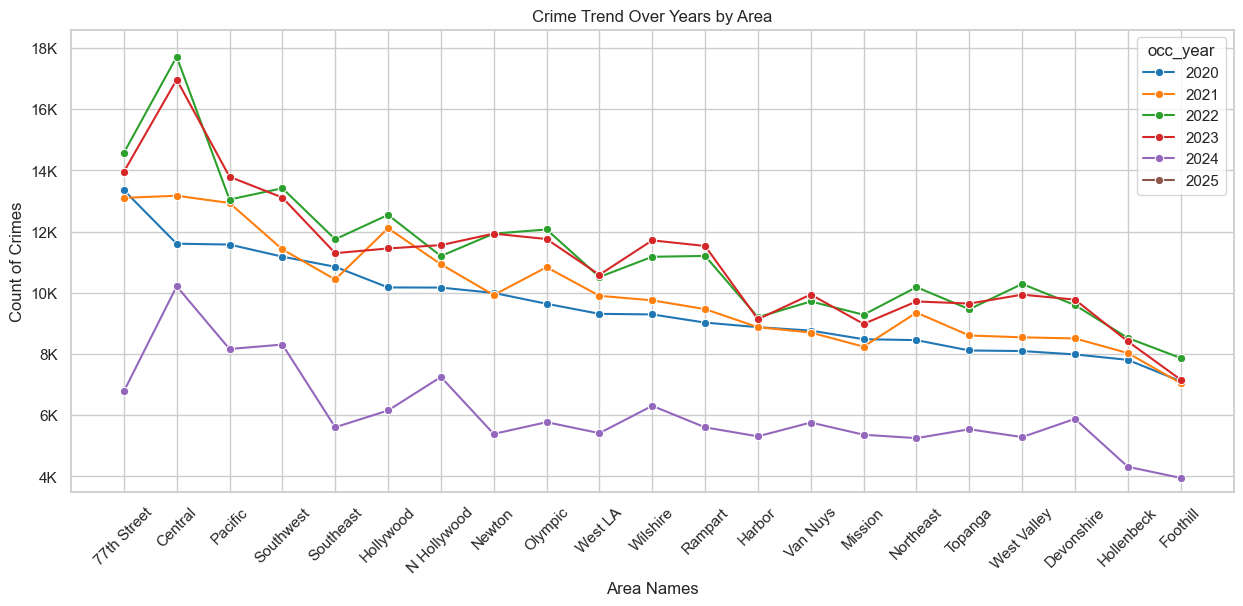

In [26]:
plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid')

ax=sns.lineplot(data=plot9,x='AREA NAME',y='count',hue='occ_year',marker='o',palette='tab10')
plt.setp(ax.get_xticklabels(),rotation=45,ha='center')
plt.ylabel('Count of Crimes')
plt.xlabel('Area Names')
plt.title('Crime Trend Over Years by Area')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.ylim(3500)
plt.show()

Age Distribution of Victims

In [27]:
bins=[0,12,18,30,45,60,float('inf')]
labels=['0-12','13-18','19-30','31-45','46-60','>60']
df['age_bin']=pd.cut(df['Vict Age'],bins=bins,labels=labels,right=False, include_lowest=True)

In [28]:
plot10=df.groupby('age_bin',observed=True).size().reset_index(name='count')
plot10

,age_bin,count
0,0-12,275740
1,13-18,19080
2,19-30,195843
3,31-45,266481
4,46-60,156826
5,>60,90884


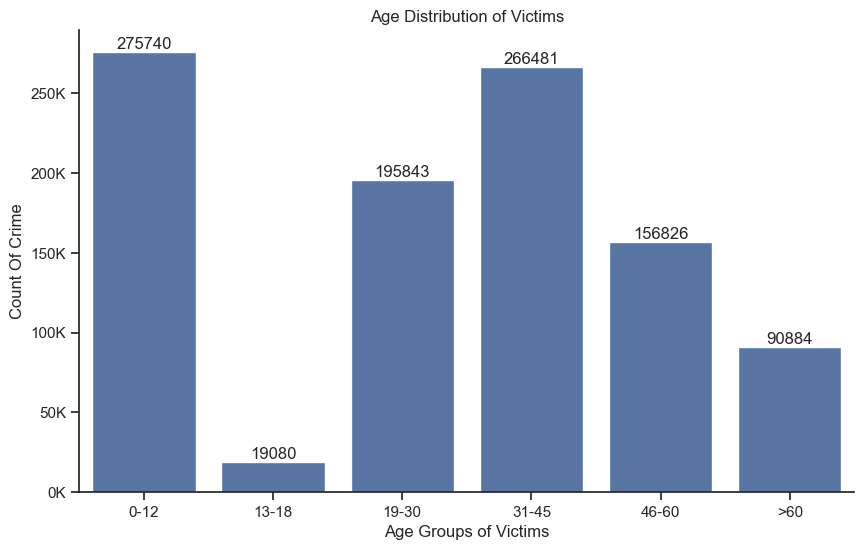

In [29]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot10,y='count',x='age_bin')
plt.xlabel('Age Groups of Victims')
plt.ylabel('Count Of Crime')
plt.title('Age Distribution of Victims')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

Gender Breakdown

In [30]:
plot11=df.groupby('Vict Sex').size().sort_values(ascending=False).reset_index(name='count')
plot11

,Vict Sex,count
0,Male,403879
1,Female,358580
2,Unknown,242418
3,Transgender/Other,114


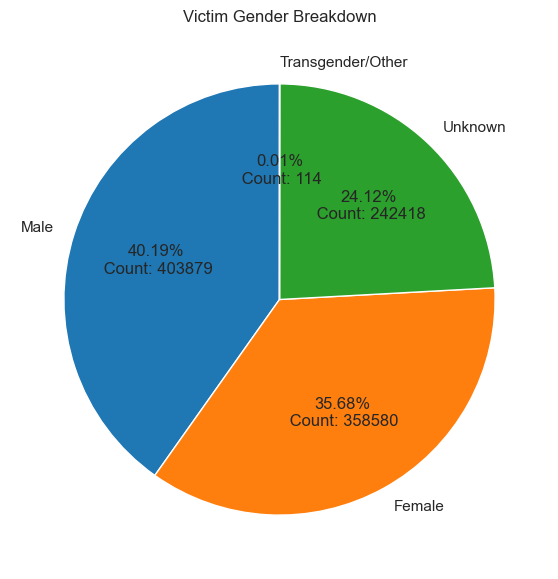

In [31]:
plt.figure(figsize=(7,7))

plt.pie(plot11['count'],
        labels=plot11['Vict Sex'],
        autopct=lambda p: f'{p:.2f}%\n Count: {p*sum(plot11['count'])/100:.0f}',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
        colors=plt.cm.tab10.colors)

plt.title('Victim Gender Breakdown')
plt.show()

Descent Distribution

In [32]:
plot12=df.groupby('Vict Descent').size().sort_values(ascending=False).reset_index(name='count')
plot12

,Vict Descent,count
0,Hispanic/Latin/Mexican,296404
1,Unknown,251341
2,White,201442
3,Black,135816
4,Other,78005
5,Other Asian,21340
6,Korean,5990
7,Filipino,4838
8,Chinese,4631
9,Japanese,1586


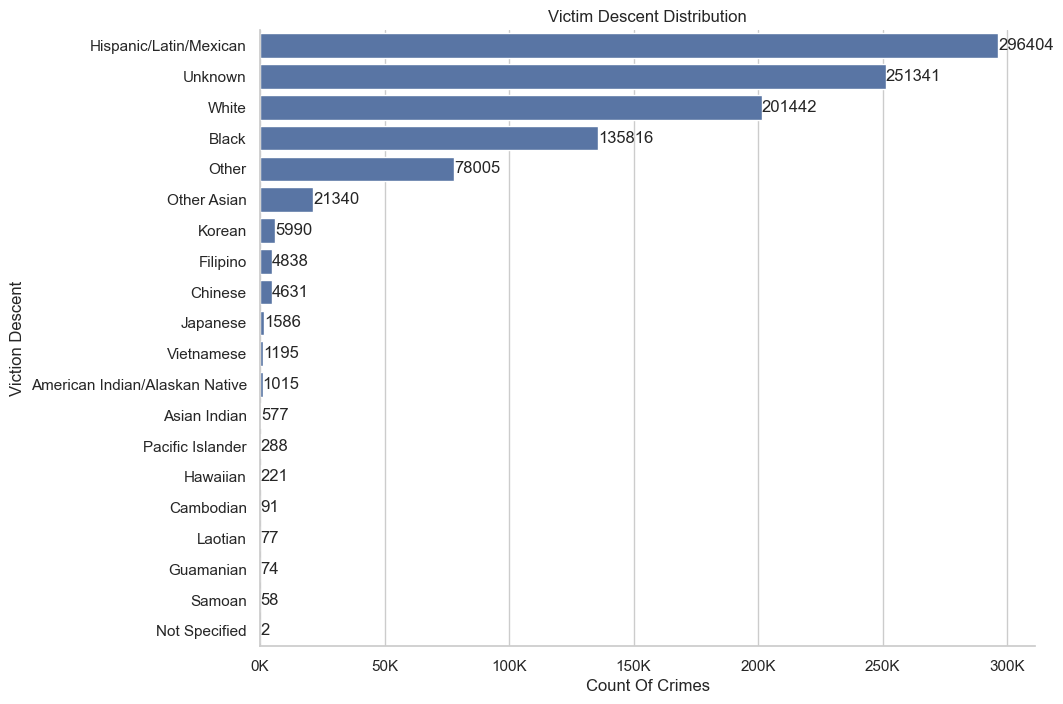

In [33]:
plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')

ax=sns.barplot(data=plot12,x='count',y='Vict Descent')
plt.xlabel('Count Of Crimes')
plt.ylabel('Viction Descent')
plt.title('Victim Descent Distribution')

for i in ax.containers:
    ax.bar_label(i)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

Most Common Crime Types by Victim Gender

In [34]:
plot13=df[df['Vict Sex'] == 'Female']['Crm Cd Desc'].value_counts().head()
plot13a=df[df['Vict Sex'] == 'Male']['Crm Cd Desc'].value_counts().head()
plot13b=df[df['Vict Sex'] == 'Unknown']['Crm Cd Desc'].value_counts().head()
plot13c=df[df['Vict Sex'] == 'Transgender/Other']['Crm Cd Desc'].value_counts().head()

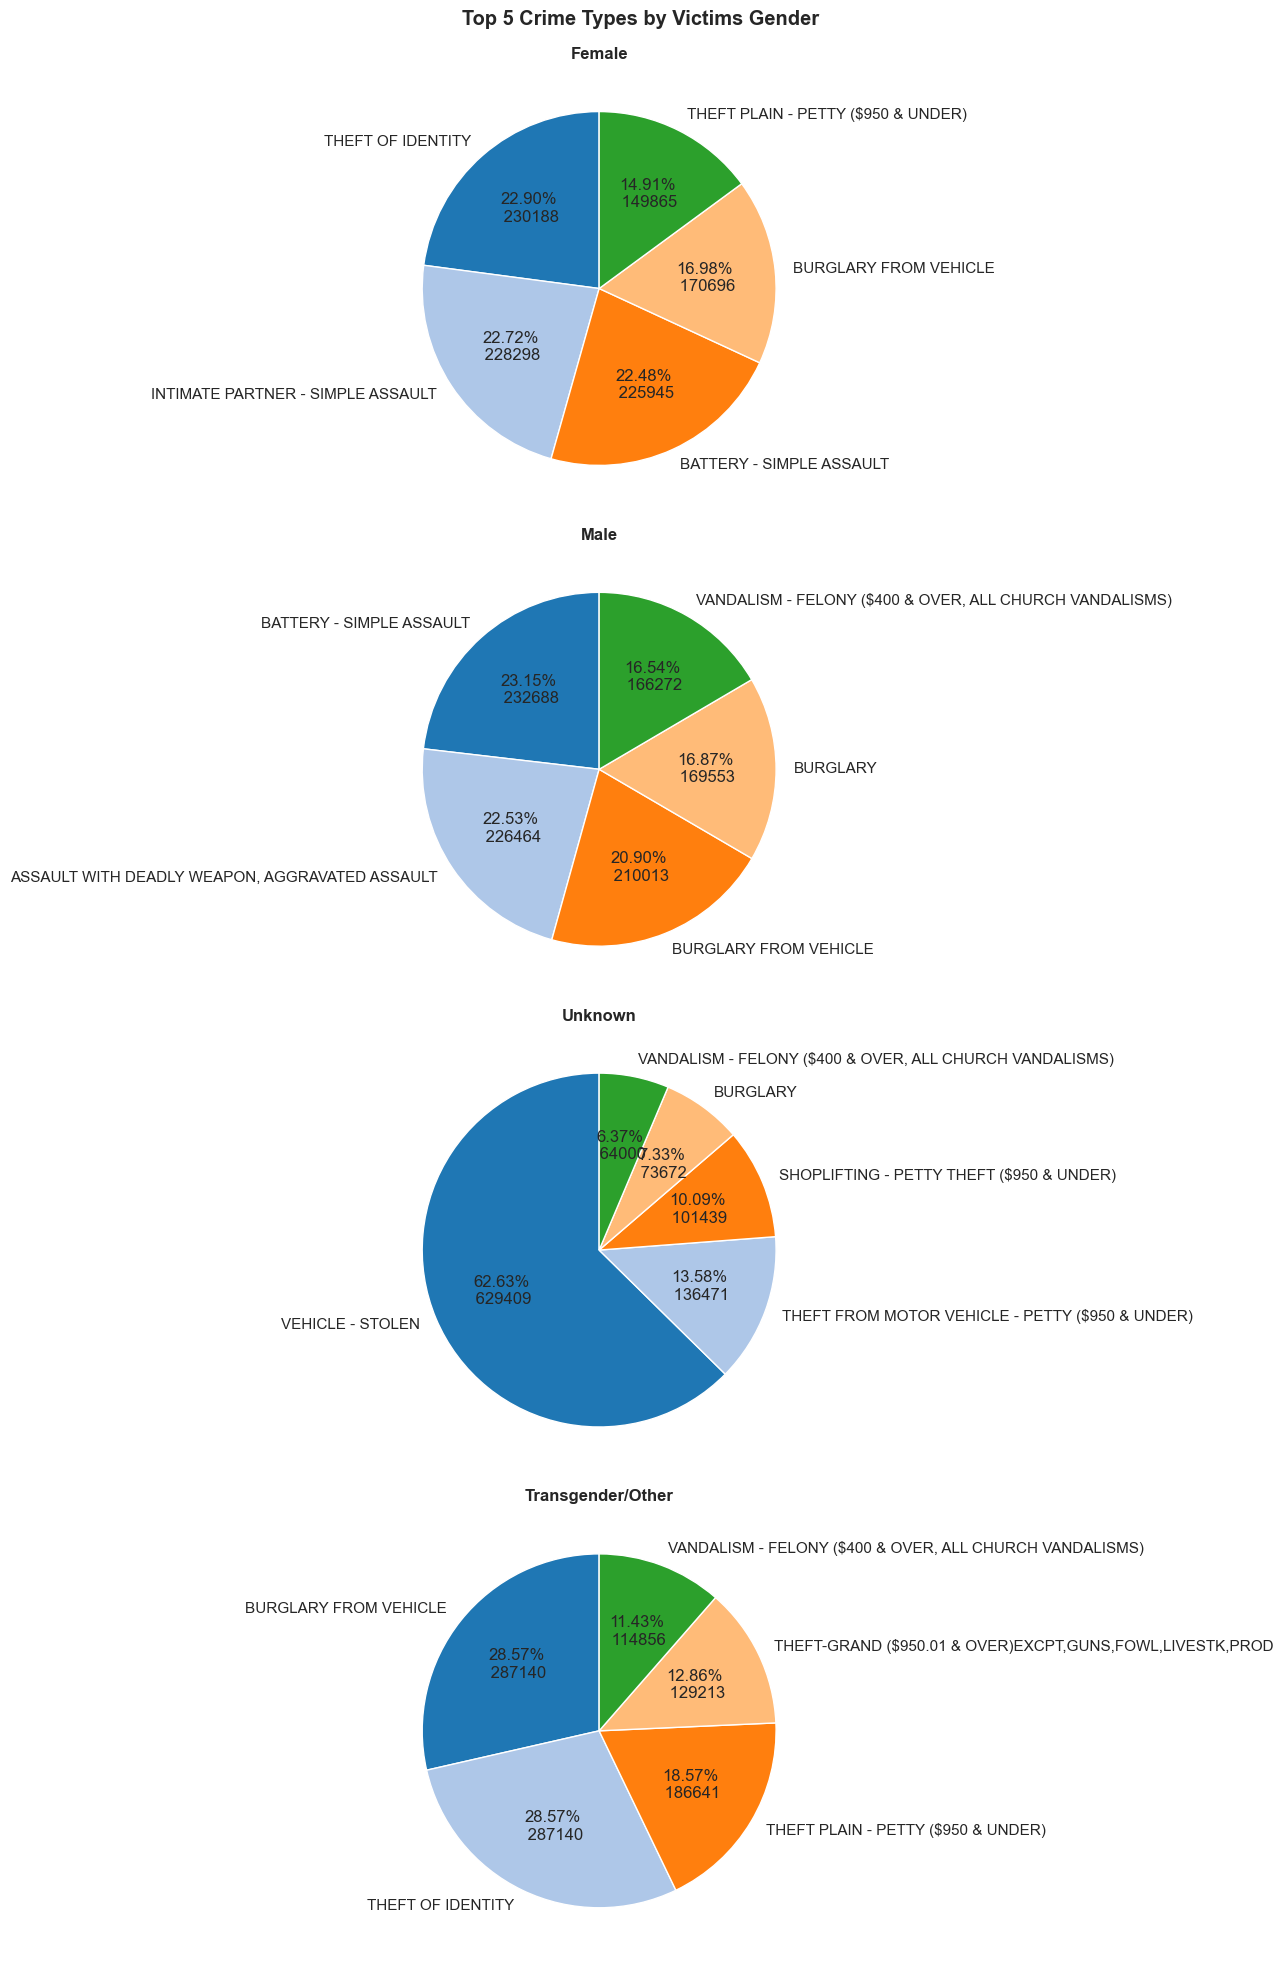

In [35]:
series_list = [
    ('Female', plot13),
    ('Male', plot13a),
    ('Unknown', plot13b),
    ('Transgender/Other', plot13c)
]

fig, ax = plt.subplots(4, 1, figsize=(10, 20))
colors = plt.cm.tab20.colors 

for i, (title, data) in enumerate(series_list):
    ax[i].pie(
        data,
        labels=data.index,
        autopct=lambda p: f'{p:.2f}%\n {p*sum(plot11['count'])/100:.0f}',
        startangle=90,
        colors=colors
    )
    ax[i].set_title(title, fontsize=12, weight='bold')


plt.suptitle('Top 5 Crime Types by Victims Gender\n', weight='bold')

plt.tight_layout()
plt.show()

Age Group vs Crime Type Heatmap

In [36]:
plot14=df.groupby('age_bin',observed=True)['Crm Cd Desc'].value_counts().groupby(level=0).head(7).reset_index(name='count')
plot14

,age_bin,Crm Cd Desc,count
0,0-12,VEHICLE - STOLEN,114843
1,0-12,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),25033
2,0-12,SHOPLIFTING - PETTY THEFT ($950 & UNDER),21512
3,0-12,BURGLARY,18130
4,0-12,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14735
5,0-12,TRESPASSING,9662
6,0-12,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",7470
7,13-18,BATTERY - SIMPLE ASSAULT,3527
8,13-18,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1953
9,13-18,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,1808


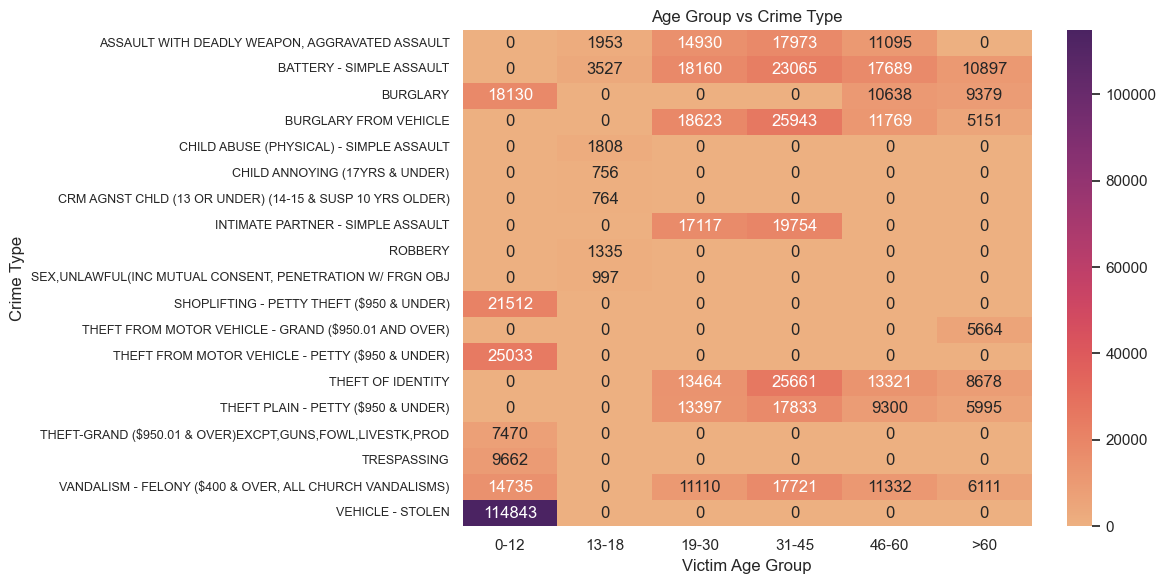

In [37]:
heatmap_data=plot14.pivot_table(
    index='Crm Cd Desc',
    columns='age_bin',
    values='count',
    fill_value=0
)

plt.figure(figsize=(12,6))
ax=sns.heatmap(heatmap_data, cmap='flare', annot=True, fmt='.0f')
plt.title('Age Group vs Crime Type')
plt.xlabel('Victim Age Group')
plt.ylabel('Crime Type')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

Victim Descent vs Area Comparison

In [38]:
top5 = df['Vict Descent'].value_counts().sort_values(ascending=False).head().index
plot15= (
    df[df['Vict Descent'].isin(top5)]
    .groupby('Vict Descent')['AREA NAME']
    .value_counts()
    .groupby(level=0)
    .head(21)
    .reset_index(name='count')
)
plot15

,Vict Descent,AREA NAME,count
0,Black,77th Street,22993
1,Black,Southwest,16790
2,Black,Southeast,16514
3,Black,Central,13516
4,Black,Newton,7569
...,...,...,...
100,White,Newton,4502
101,White,Mission,4022
102,White,Hollenbeck,3108
103,White,77th Street,1671


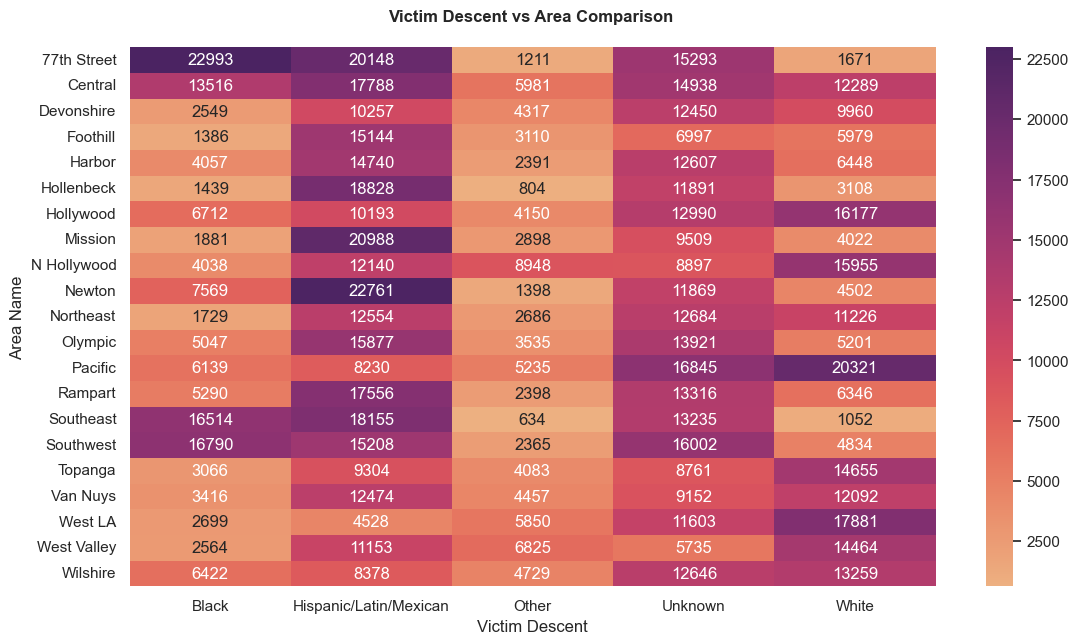

In [39]:
plt.figure(figsize=(13,7))

heatmap_data1=plot15.pivot_table(
    index='AREA NAME',
    columns='Vict Descent',
    values='count',
    fill_value=0
)

ax=sns.heatmap(heatmap_data1, cmap='flare', annot=True, fmt='.0f')
plt.xlabel('Victim Descent')
plt.ylabel('Area Name')
plt.title('Victim Descent vs Area Comparison \n',weight='bold')
plt.show()

Crime Severity by Weapon Usage

In [40]:
plot16=df.groupby('Weapon Desc',observed=True).size().sort_values(ascending=False).head(10).iloc[1:].reset_index(name='count')
plot16

,Weapon Desc,count
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761
1,UNKNOWN WEAPON/OTHER WEAPON,36390
2,VERBAL THREAT,23846
3,HAND GUN,20182
4,SEMI-AUTOMATIC PISTOL,7267
5,KNIFE WITH BLADE 6INCHES OR LESS,6838
6,UNKNOWN FIREARM,6582
7,OTHER KNIFE,5879
8,MACE/PEPPER SPRAY,3730


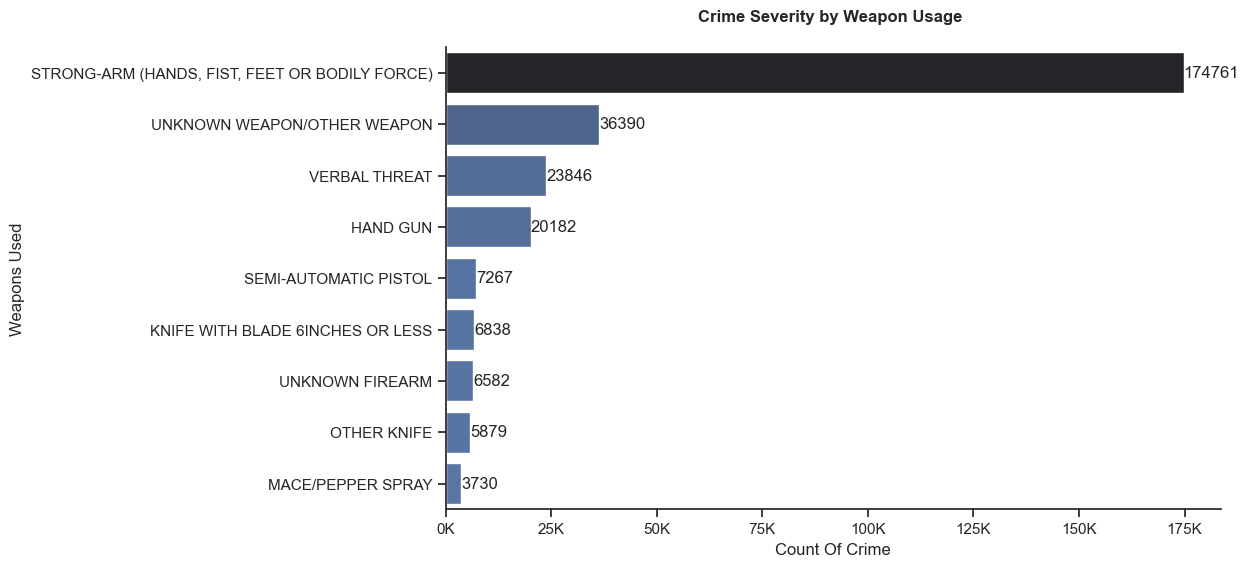

In [41]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot16,x='count',y='Weapon Desc',hue='count',palette='dark:b_r')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
plt.xlabel('Count Of Crime')
plt.ylabel('Weapons Used')
plt.title('Crime Severity by Weapon Usage \n', weight='bold')
for i in ax.containers:
    ax.bar_label(i)

ax.legend_.remove()
sns.despine()
plt.show()

Average Victim Age for Violent vs Non-Violent Crimes

In [42]:
violent_keywords = [
    'ASSAULT', 'BATTERY', 'HOMICIDE', 'MANSLAUGHTER', 
    'RAPE', 'SEXUAL', 'ROBBERY', 'THREAT', 'KIDNAPPING',
    'CHILD ABUSE', 'LEWD', 'BRANDISH', 'ARSON', 
    'INTIMATE PARTNER', 'INCEST'
]

df['Crime Type'] = df['Crm Cd Desc'].apply(
    lambda x: 'Violent' if any(word in str(x).upper() for word in violent_keywords) else 'Non-Violent'
)

In [43]:
plot17=df.groupby('Crime Type')['Vict Age'].mean().round(2).reset_index(name='avg_age')
plot17

,Crime Type,avg_age
0,Non-Violent,26.24
1,Violent,35.31


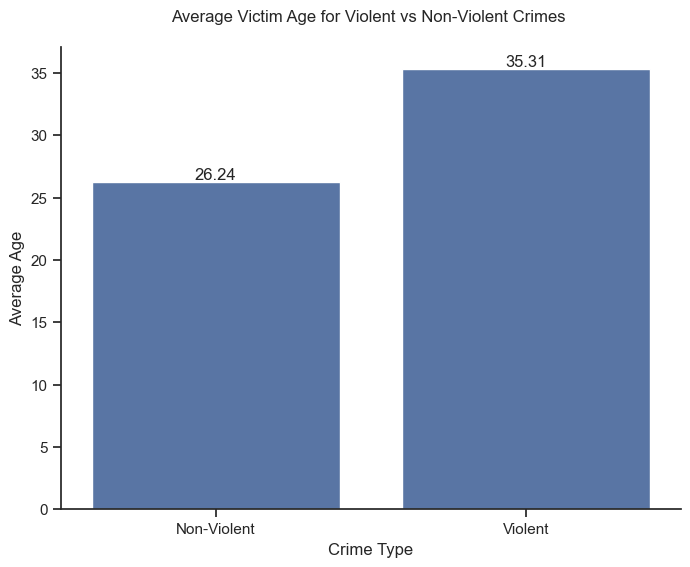

In [44]:
plt.figure(figsize=(8,6))
ax=sns.barplot(data=plot17,x='Crime Type',y='avg_age')
plt.xlabel('Crime Type')
plt.ylabel('Average Age')
plt.title('Average Victim Age for Violent vs Non-Violent Crimes \n')
for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

Top 10 Premises Where Crimes Occur

In [45]:
plto18=df.groupby('Premis Desc').size().sort_values(ascending=False).head(10).reset_index(name='count')
plto18

,Premis Desc,count
0,STREET,261284
1,SINGLE FAMILY DWELLING,163654
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119011
3,PARKING LOT,69147
4,OTHER BUSINESS,47647
5,SIDEWALK,40861
6,"VEHICLE, PASSENGER/TRUCK",29302
7,GARAGE/CARPORT,19362
8,DRIVEWAY,16082
9,DEPARTMENT STORE,14433


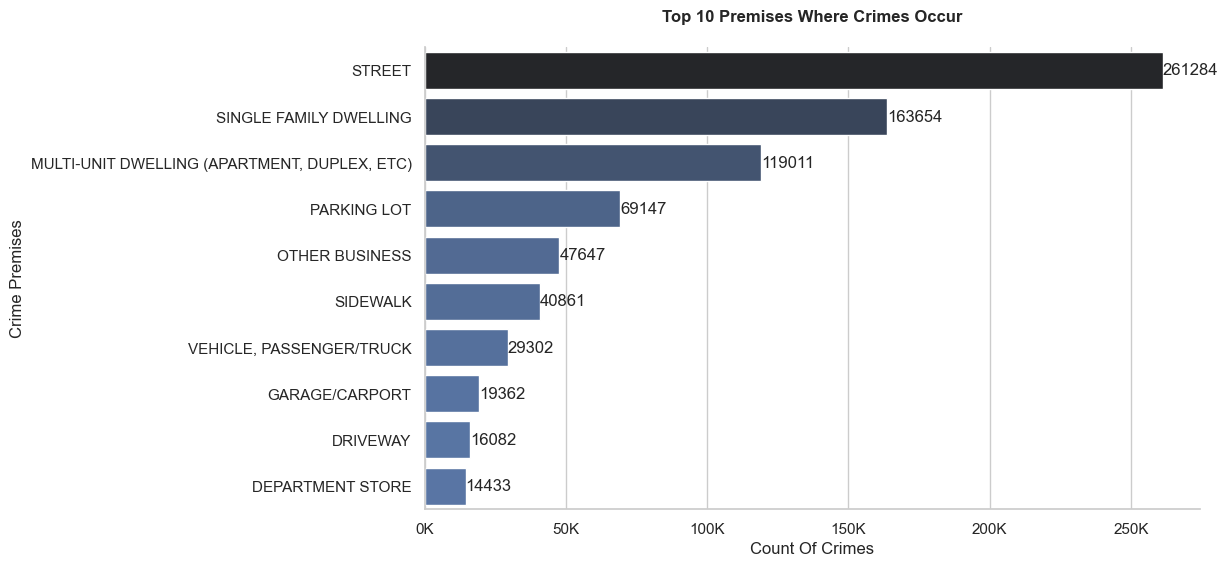

In [46]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')

ax=sns.barplot(data=plto18,x='count',y='Premis Desc',hue='count',palette='dark:b_r')
plt.xlabel('Count Of Crimes')
plt.ylabel('Crime Premises')
plt.title('Top 10 Premises Where Crimes Occur\n', weight='bold')
ax.legend_.remove()
for i in ax.containers:
    ax.bar_label(i)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

Premise-wise Crime Frequency by Year

In [47]:
plto19=df.groupby('occ_year')['Premis Desc'].value_counts().groupby(level=0).head(10).reset_index(name='count')
plto19

,occ_year,Premis Desc,count
0,2020,STREET,50456
1,2020,SINGLE FAMILY DWELLING,34182
2,2020,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",24339
3,2020,PARKING LOT,14457
4,2020,SIDEWALK,9319
5,2020,OTHER BUSINESS,9198
6,2020,"VEHICLE, PASSENGER/TRUCK",6768
7,2020,GARAGE/CARPORT,4188
8,2020,DRIVEWAY,4008
9,2020,RESTAURANT/FAST FOOD,2493


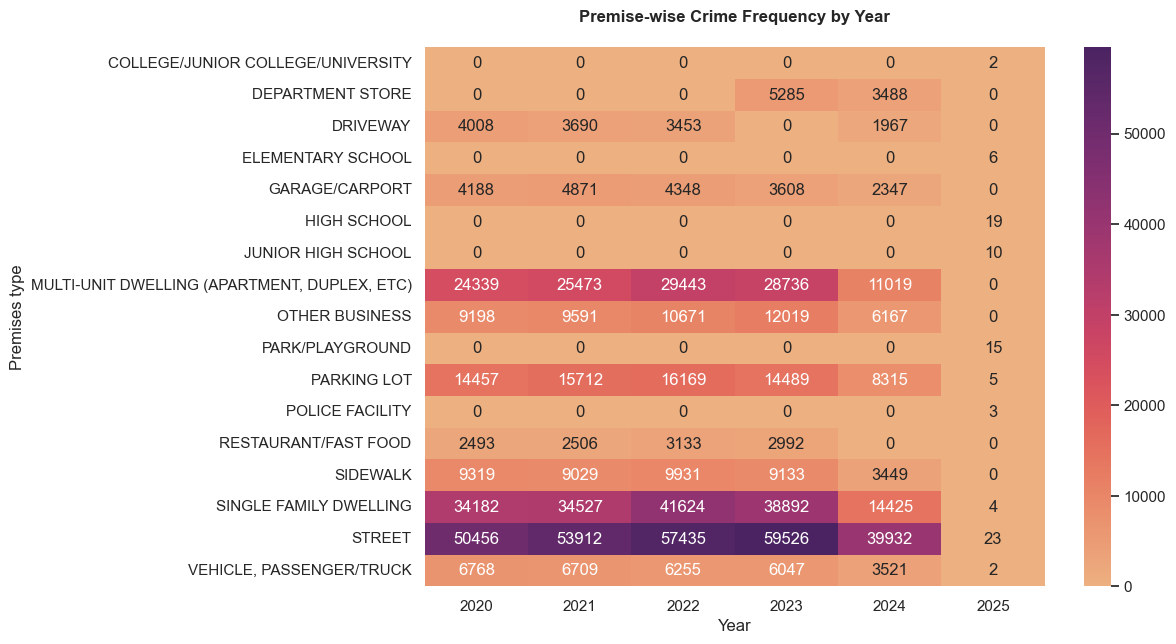

In [48]:
plt.figure(figsize=(10,7))
heatmap_data111=plto19.pivot_table(
    index='Premis Desc',
    columns='occ_year',
    values='count',
    fill_value=0
)

ax=sns.heatmap(data=heatmap_data111,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Year')
plt.ylabel('Premises type')
plt.title('Premise-wise Crime Frequency by Year\n',weight='bold')

plt.show()

Area vs Premise Relationship

In [49]:
plto20=df.groupby('AREA NAME')['Premis Desc'].value_counts().groupby(level=0).head(7).reset_index(name='count')
plto20

,AREA NAME,Premis Desc,count
0,77th Street,STREET,21714
1,77th Street,SINGLE FAMILY DWELLING,16571
2,77th Street,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",4765
3,77th Street,SIDEWALK,2723
4,77th Street,PARKING LOT,2561
...,...,...,...
142,Wilshire,OTHER BUSINESS,5608
143,Wilshire,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",5083
144,Wilshire,PARKING LOT,2180
145,Wilshire,SIDEWALK,1670


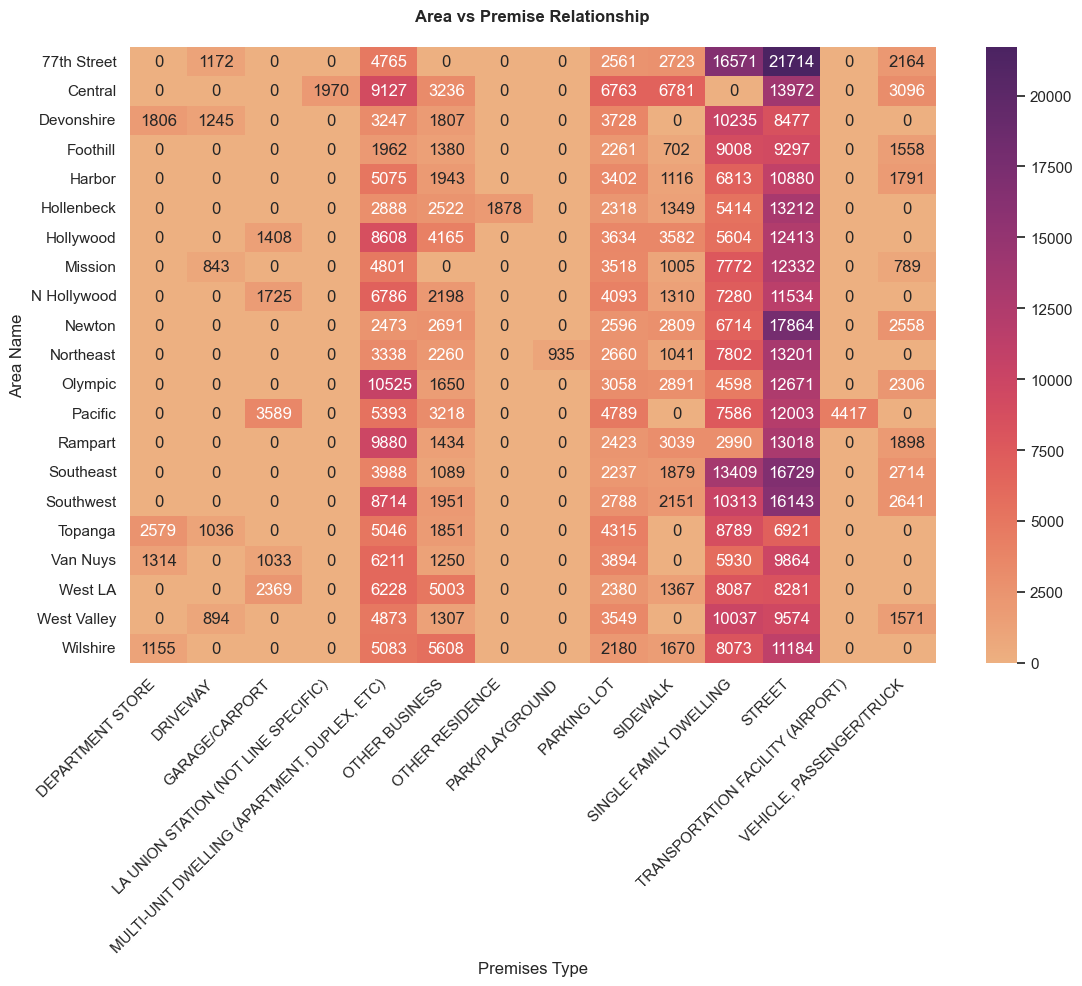

In [50]:
plt.figure(figsize=(13,8))
heatmap_data112=plto20.pivot_table(
    index='AREA NAME',
    columns='Premis Desc',
    values='count',
    fill_value=0
)

ax=sns.heatmap(data=heatmap_data112,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Premises Type')
plt.ylabel('Area Name')
plt.title('Area vs Premise Relationship\n', weight='bold')

plt.setp(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

Filter Crimes Related to Vehicles

In [51]:
keyword=['CAR','VEHICLE','MOTOR']

df['car_involved']=df['Crm Cd Desc'].apply(
    lambda x: 'Yes' if any(word in str(x).upper() for word in keyword) else 'No'
)

In [52]:
plto21=df[df['car_involved'] == 'Yes']['Crm Cd Desc'].value_counts().head(10).reset_index(name='count')
plto21

,Crm Cd Desc,count
0,VEHICLE - STOLEN,115190
1,BURGLARY FROM VEHICLE,63517
2,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,36941
4,VEHICLE - ATTEMPT STOLEN,3864
5,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",2935
6,THEFT FROM MOTOR VEHICLE - ATTEMPT,857
7,THROWING OBJECT AT MOVING VEHICLE,791
8,"BURGLARY FROM VEHICLE, ATTEMPTED",707
9,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",475


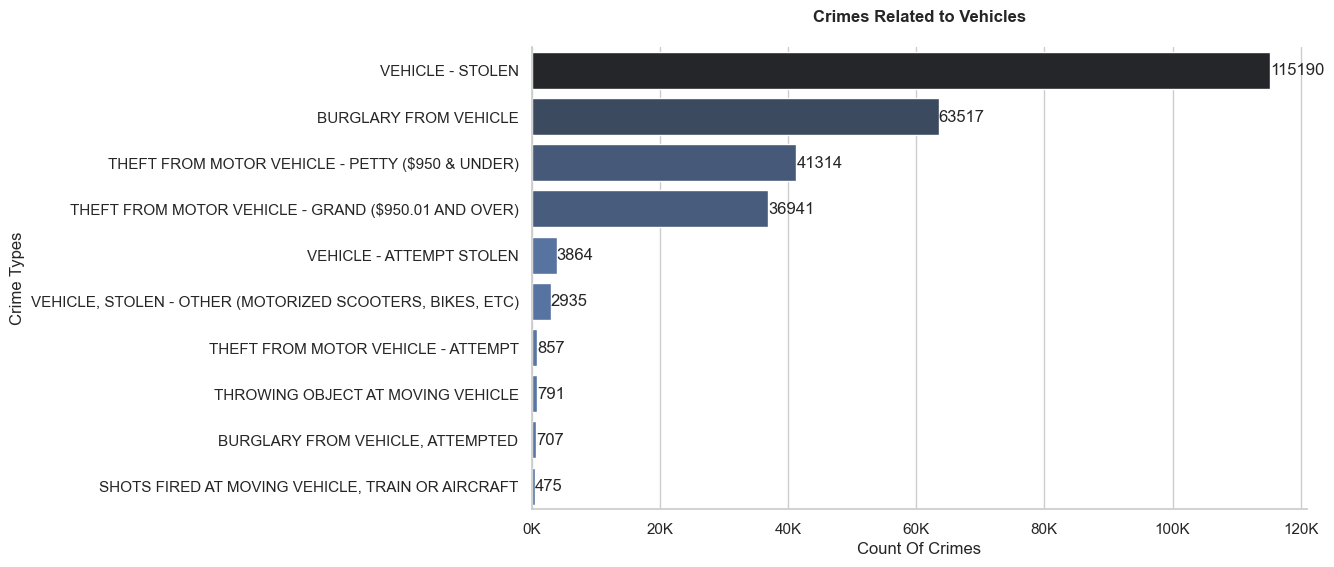

In [53]:
plt.figure(figsize=(10,6))

ax=sns.barplot(data=plto21,x='count',y='Crm Cd Desc',hue='count',palette='dark:b_r')
plt.xlabel('Count Of Crimes')
plt.ylabel('Crime Types')
plt.title('Crimes Related to Vehicles\n',weight='bold')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
for i in ax.containers:
    ax.bar_label(i)
ax.legend_.remove()
sns.despine()
plt.show()

Monthly Trend of Vehicle Thefts or Break-ins

In [54]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['occ_month']=pd.Categorical(df['occ_month'],categories=month_order, ordered=True)
crimes = df[df['Crm Cd Desc'].isin(['VEHICLE - STOLEN','BURGLARY FROM VEHICLE, ATTEMPTED'])]
plto23=crimes.groupby(['occ_month','Crm Cd Desc']).size().reset_index(name='count')
plto23

,occ_month,Crm Cd Desc,count
0,Jan,"BURGLARY FROM VEHICLE, ATTEMPTED",70
1,Jan,VEHICLE - STOLEN,9477
2,Feb,"BURGLARY FROM VEHICLE, ATTEMPTED",77
3,Feb,VEHICLE - STOLEN,8690
4,Mar,"BURGLARY FROM VEHICLE, ATTEMPTED",53
5,Mar,VEHICLE - STOLEN,9360
6,Apr,"BURGLARY FROM VEHICLE, ATTEMPTED",52
7,Apr,VEHICLE - STOLEN,9473
8,May,"BURGLARY FROM VEHICLE, ATTEMPTED",56
9,May,VEHICLE - STOLEN,9755


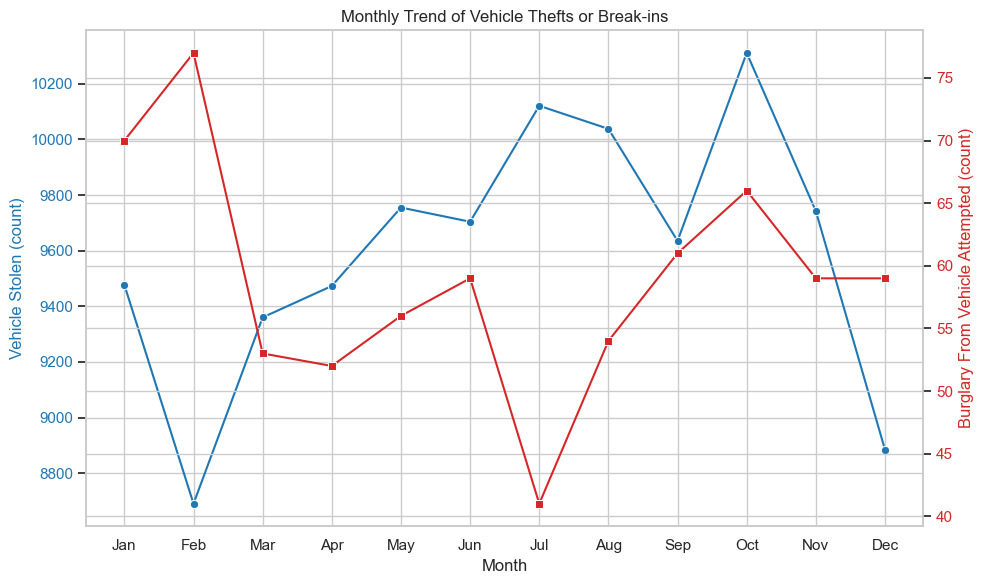

In [55]:
stolen = plto23[plto23['Crm Cd Desc'] == 'VEHICLE - STOLEN']
burglary = plto23[plto23['Crm Cd Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED']

sns.set_theme(style='whitegrid')
fig,ax1=plt.subplots(figsize=(10,6))

sns.lineplot(data=stolen,x='occ_month',y='count',ax=ax1,color='tab:blue', marker='o', label='Vehicle Stolen')
ax1.tick_params(axis='y',labelcolor='tab:blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Vehicle Stolen (count)', color='tab:blue')
ax1.legend_.remove()

ax2=ax1.twinx()

sns.lineplot( data=burglary, x='occ_month', y='count', ax=ax2, color='tab:red', marker='s', label='Burglary Attempted')
ax2.tick_params(axis='y',labelcolor='tab:red')
ax2.set_ylabel('Burglary From Vehicle Attempted (count)', color='tab:red')
ax2.legend_.remove()

plt.title('Monthly Trend of Vehicle Thefts or Break-ins')
plt.tight_layout()
plt.show()

Common Time and Areas for Vehicle Crimes

In [57]:
crime1['TIME OCC'] = pd.to_datetime(crime1['TIME OCC'], errors='coerce')
crime1['hour'] = crime1['TIME OCC'].dt.hour


In [58]:
bins = [0, 6, 10, 14, 18, 22, 24]
labels = ['Late Night(0-6)', 'Morning Rush(6-10)', 'Midday(10-14)', 'Afternoon(14-18)', 'Evening Rush(18-22)', 'Late Evening(22-24)']

crime1['time_buck']=pd.cut(crime1['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

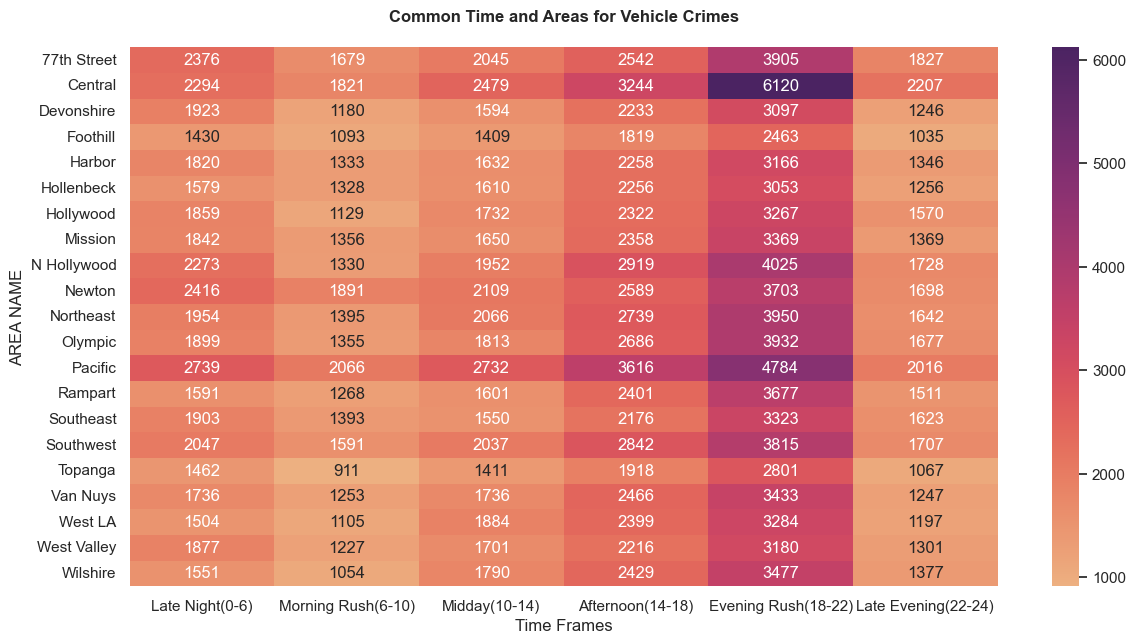

In [59]:
plot24=crime1.groupby('time_buck',observed=True)['AREA NAME'].value_counts().reset_index(name='count')

heatmap_data113=plot24.pivot_table(
    index='AREA NAME',observed=True,
    columns='time_buck',
    values='count',
    fill_value=0
)

plt.figure(figsize=(14,7))
ax=sns.heatmap(heatmap_data113,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Time Frames')
plt.title('Common Time and Areas for Vehicle Crimes\n',weight='bold')
plt.show()

Weapon Involvement in Vehicle Crimes

In [60]:
plot25=crime1['Weapon Desc'].value_counts().head(10).reset_index(name='count')
plot25

,Weapon Desc,count
0,Unknown,261057
1,UNKNOWN WEAPON/OTHER WEAPON,4229
2,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",394
3,ROCK/THROWN OBJECT,267
4,VERBAL THREAT,247
5,HAND GUN,225
6,BOMB THREAT,170
7,UNKNOWN FIREARM,166
8,SEMI-AUTOMATIC PISTOL,82
9,UNKNOWN TYPE CUTTING INSTRUMENT,66


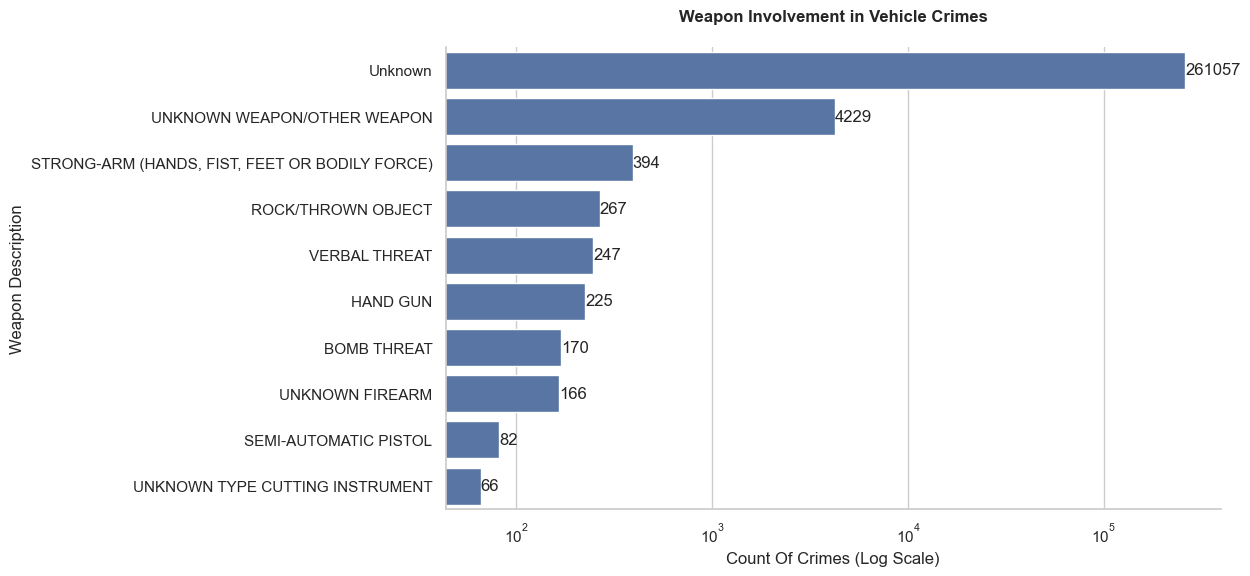

In [61]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot25,x='count',y='Weapon Desc')
plt.xscale('log')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count Of Crimes (Log Scale)')
plt.ylabel('Weapon Description')
plt.title('Weapon Involvement in Vehicle Crimes\n',weight='bold')
sns.despine()
plt.show()

Victim Profile in Vehicle-Related Crimes

In [62]:
plot26= crime1['Vict Sex'].value_counts().reset_index(name='count')
plot26

,Vict Sex,count
0,Unknown,145392
1,Male,71353
2,Female,50491
3,Transgender/Other,29


In [63]:
plot27=crime1['Vict Descent'].value_counts().reset_index(name='count')
plot27

,Vict Descent,count
0,Unknown,146003
1,White,41421
2,Hispanic/Latin/Mexican,41146
3,Black,15032
4,Other,12448
5,Other Asian,3758
6,Filipino,2025
7,Korean,1931
8,Chinese,1623
9,Japanese,686


In [64]:
bins=0,12,18,30,45,60,float('inf')
labels=['kids (0-11)','tennager (12-17)','young (18-29)','adult (30-44)','mid-age (44-59)','old (>60)']
crime1['age-group']=pd.cut(crime1['Vict Age'],bins=bins,labels=labels,right=False,include_lowest=True)

In [65]:
plot28=crime1.groupby('age-group',observed=True).size().reset_index(name='count')
plot28

,age-group,count
0,kids (0-11),146847
1,tennager (12-17),125
2,young (18-29),32141
3,adult (30-44),47495
4,mid-age (44-59),26507
5,old (>60),14147


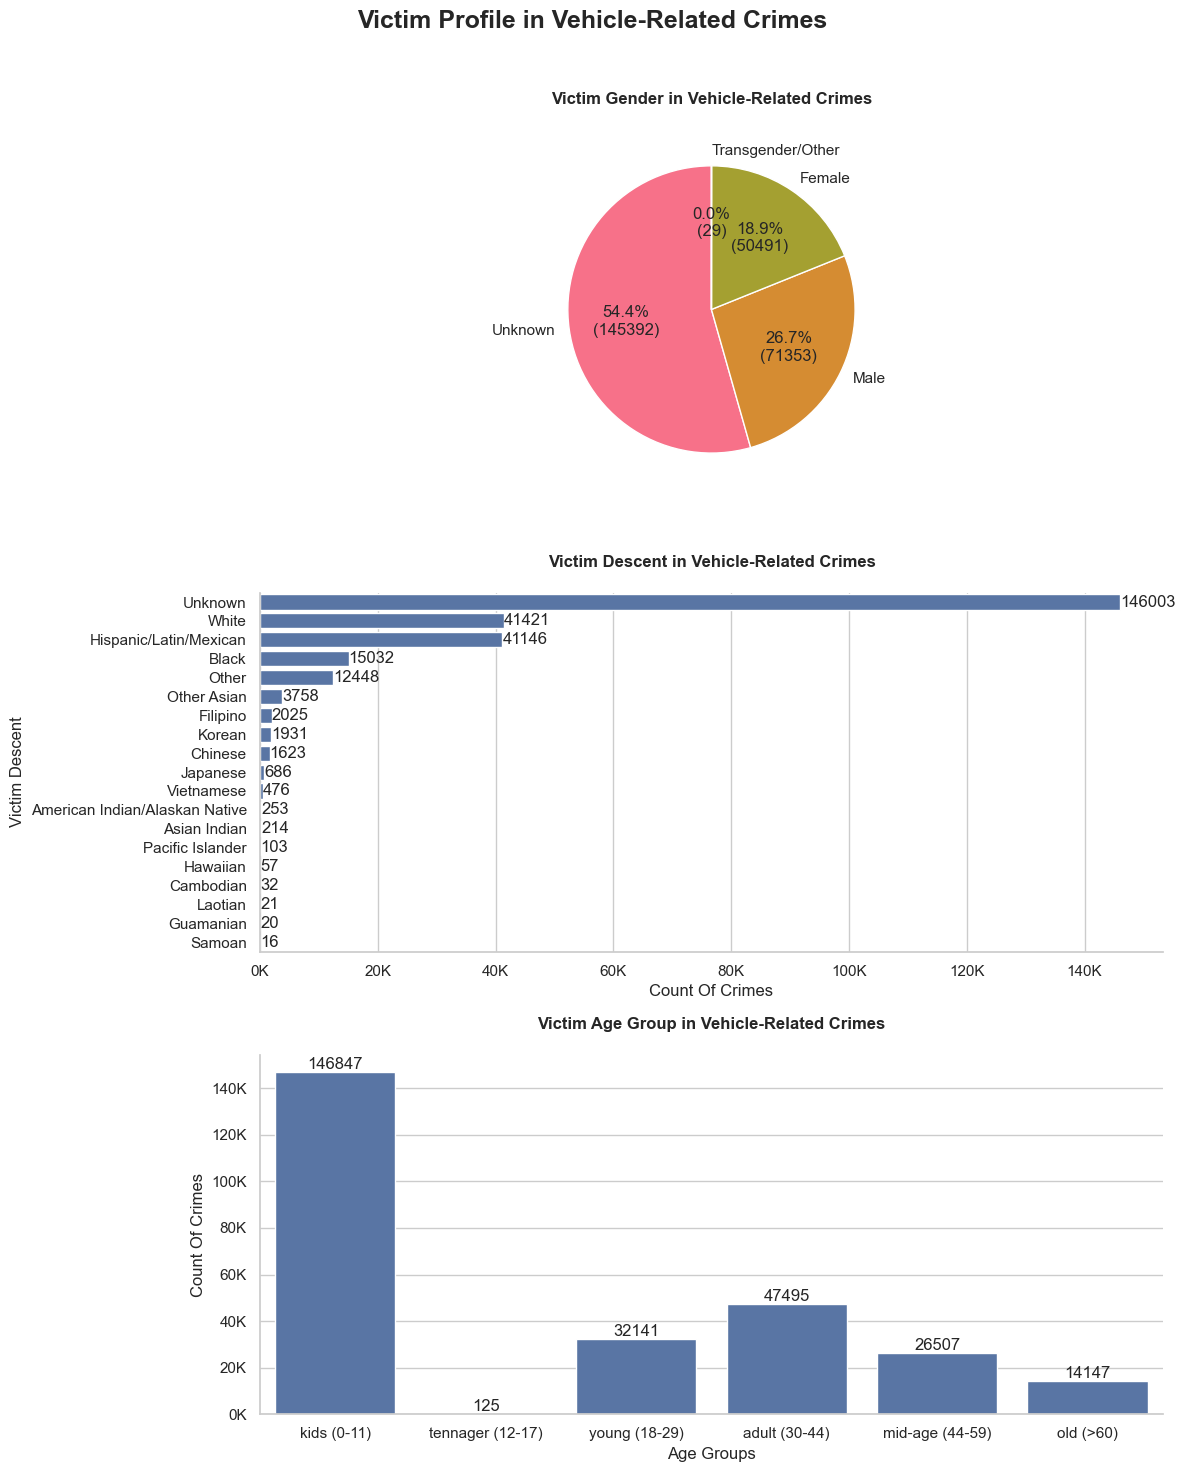

In [66]:
fig,ax=plt.subplots(3,1,figsize=(12,15))
sns.set_theme(style='ticks')
plt.suptitle('Victim Profile in Vehicle-Related Crimes\n\n',weight='bold',fontsize=18)

ax[0].pie(
    plot26['count'],
    labels=plot26['Vict Sex'],
    autopct=lambda p: f'{p:.1f}%\n({p*sum(plot26['count'])/100:.0f})',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    colors=sns.color_palette("husl", 9)
)
ax[0].set_title('Victim Gender in Vehicle-Related Crimes\n',weight='bold')

sns.barplot(data=plot27,x='count',y='Vict Descent',ax=ax[1])
ax[1].set_title('Victim Descent in Vehicle-Related Crimes\n',weight='bold')
ax[1].set_xlabel('Count Of Crimes')
ax[1].set_ylabel('Victim Descent')
for i in ax[1].containers:
    ax[1].bar_label(i)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()

sns.barplot(data=plot28,x='age-group',y='count',ax=ax[2])
ax[2].set_title('Victim Age Group in Vehicle-Related Crimes\n',weight='bold')
ax[2].set_xlabel('Age Groups')
ax[2].set_ylabel('Count Of Crimes')
for i in ax[2].containers:
    ax[2].bar_label(i)
ax[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.tight_layout()

Frequency of MO Codes

In [67]:
df['Mocodes'] = df['Mocodes'].astype(str).str.split()
df_exploded = df.explode('Mocodes', ignore_index=True)
plot29=df_exploded['Mocodes'].value_counts().head(10).reset_index(name='count')
plot29

,Mocodes,count
0,1822,342174
1,0344,299045
2,0913,151893
3,Unknown,151619
4,0329,130016
5,0416,121110
6,1300,97386
7,0400,74024
8,2000,73728
9,1402,58615


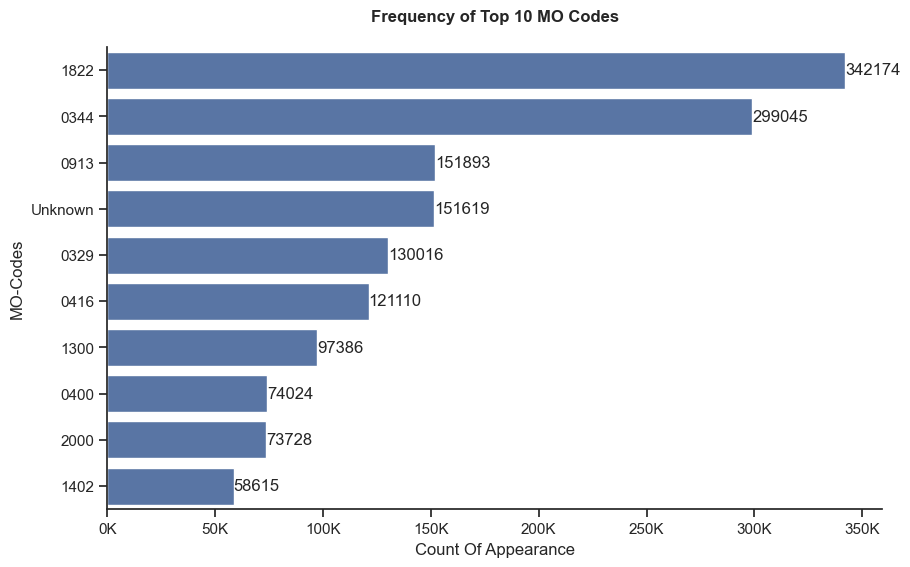

In [68]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')
ax=sns.barplot(data=plot29,x='count',y='Mocodes')
plt.title('Frequency of Top 10 MO Codes\n',weight='bold')
plt.ylabel('MO-Codes')
plt.xlabel('Count Of Appearance')
for i in ax.containers:
    ax.bar_label(i)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))
sns.despine()
plt.show()

Common Patterns Across Crime Categories

In [69]:
plot30=df_exploded.groupby('Vict Sex')['Mocodes'].value_counts().groupby(level=0).head(10).reset_index(name='count')
plot30

,Vict Sex,Mocodes,count
0,Female,1822,121126
1,Female,0344,109242
2,Female,0913,94494
3,Female,2000,57284
4,Female,0416,57240
5,Female,0329,47689
6,Female,1300,39665
7,Female,1814,37124
8,Female,0400,36114
9,Female,0444,23091


In [70]:
bins=0,12,18,30,45,60,float('inf')
labels=['kids (0-11)','tennager (12-17)','young (18-29)','adult (30-44)','mid-age (44-59)','old (>60)']
df_exploded['age-group']=pd.cut(df_exploded['Vict Age'],bins=bins,labels=labels,right=False,include_lowest=True)

In [71]:
plot31=df_exploded.groupby('age-group',observed=True)['Mocodes'].value_counts().groupby(level=0).head().reset_index(name='count')
plot31

,age-group,Mocodes,count
0,kids (0-11),Unknown,146054
1,kids (0-11),1822,53999
2,kids (0-11),0344,44295
3,kids (0-11),0325,31507
4,kids (0-11),0329,26878
5,tennager (12-17),1259,9298
6,tennager (12-17),0913,8004
7,tennager (12-17),0416,5811
8,tennager (12-17),1822,5600
9,tennager (12-17),1251,5413


In [72]:
top5=df_exploded['Vict Descent'].value_counts().sort_values(ascending=False).head().index
filt_df=df_exploded[df_exploded['Vict Descent'].isin(top5)]
plot32=filt_df.groupby('Vict Descent',observed=True)['Mocodes'].value_counts().groupby(level=0).head().reset_index(name='count')
plot32

,Vict Descent,Mocodes,count
0,Black,1822,53119
1,Black,0913,41171
2,Black,0344,36634
3,Black,0416,27309
4,Black,2000,20234
5,Hispanic/Latin/Mexican,1822,110050
6,Hispanic/Latin/Mexican,0344,80647
7,Hispanic/Latin/Mexican,0913,74959
8,Hispanic/Latin/Mexican,0416,62192
9,Hispanic/Latin/Mexican,0329,40906


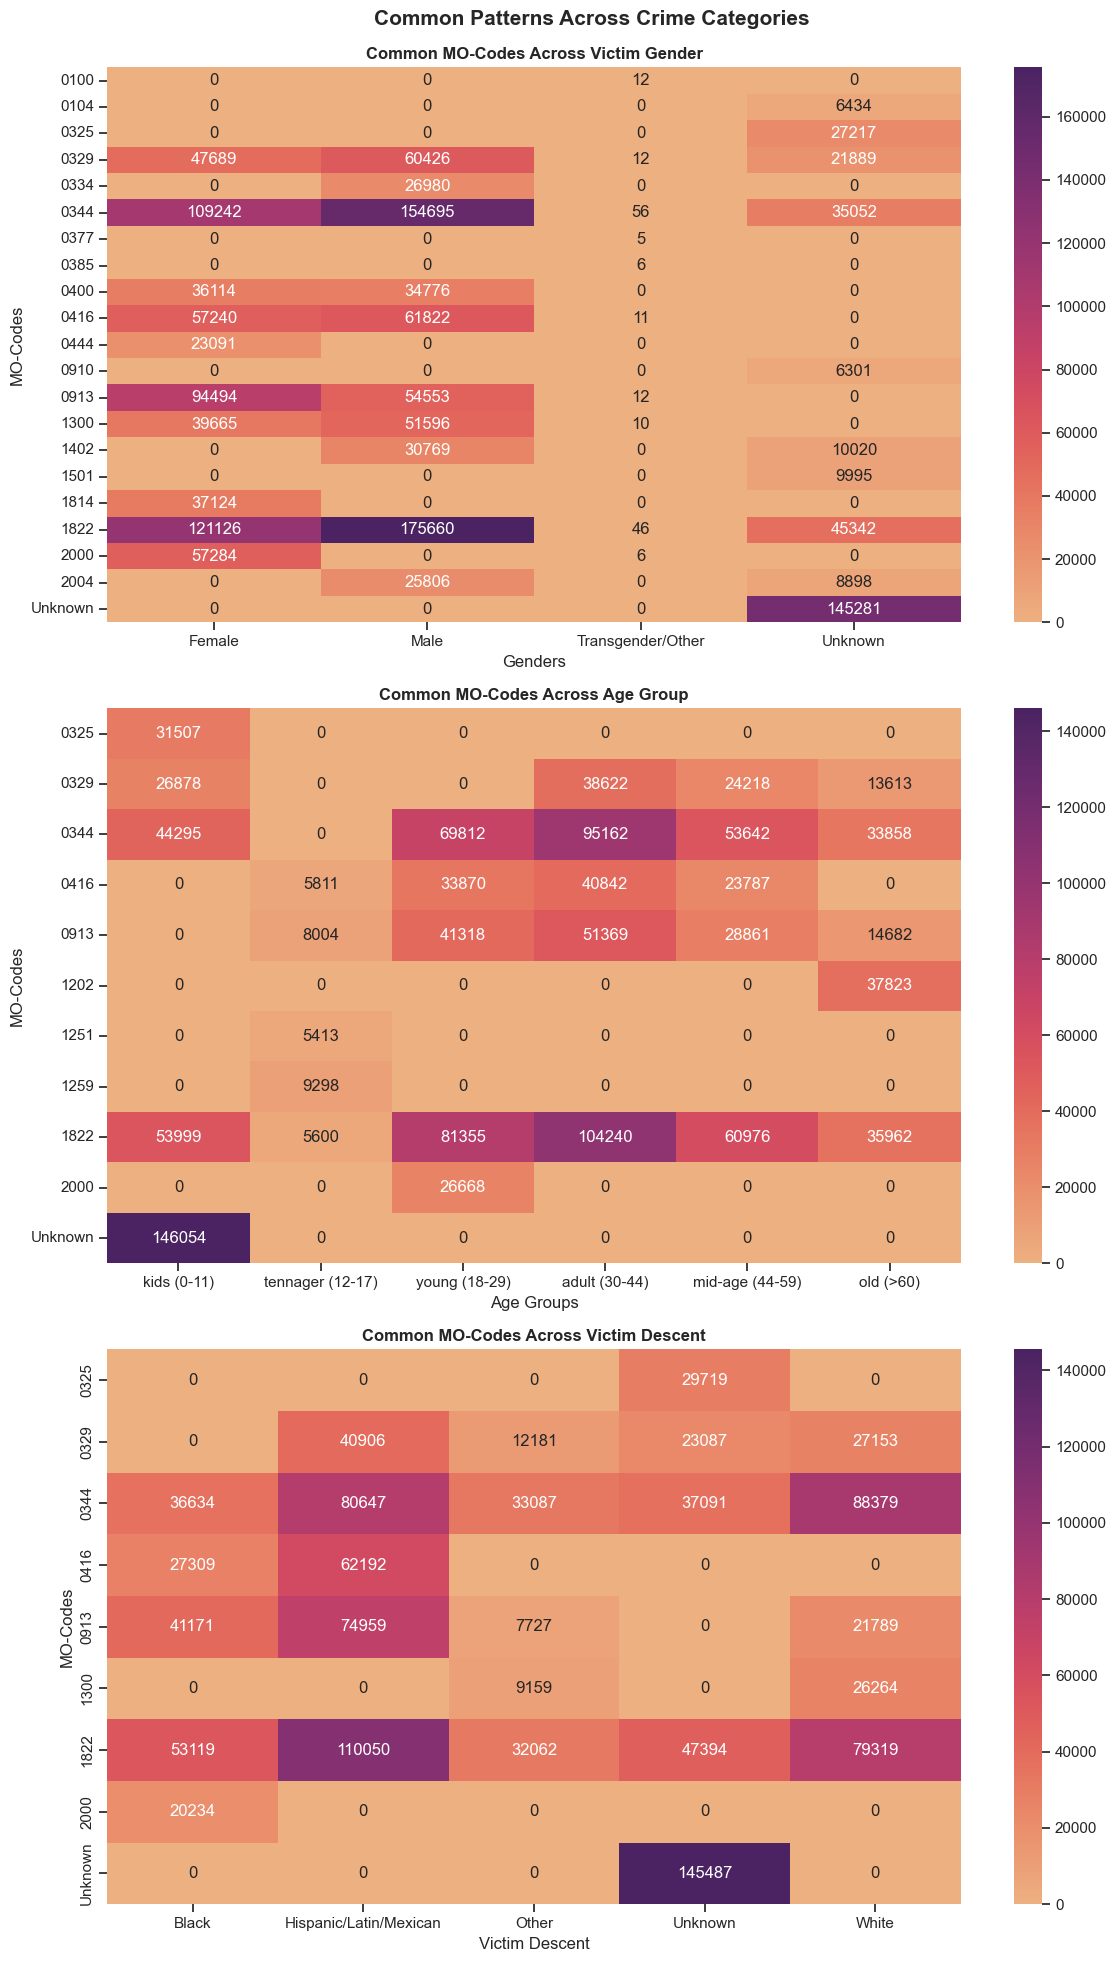

In [73]:
fig,ax=plt.subplots(3,1,figsize=(12,20))

heatmap101=plot30.pivot_table(
    index='Mocodes',observed=True,
    columns='Vict Sex',
    values='count',
    fill_value=0,
)
ax[0]=sns.heatmap(heatmap101,cmap='flare',annot=True,fmt='0.0f',ax=ax[0])
ax[0].set_ylabel('MO-Codes')
ax[0].set_xlabel('Genders')
ax[0].set_title('Common MO-Codes Across Victim Gender',weight='bold')


heatmap102=plot31.pivot_table(
    index='Mocodes',observed=True,
    columns='age-group',
    values='count',
    fill_value=0
)
ax[1]=sns.heatmap(heatmap102,cmap='flare',annot=True,fmt='0.0f',ax=ax[1])
ax[1].set_ylabel('MO-Codes')
ax[1].set_xlabel('Age Groups')
ax[1].set_title('Common MO-Codes Across Age Group',weight='bold')


heatmap103=plot32.pivot_table(
    index='Mocodes',observed=True,
    columns='Vict Descent',
    values='count',
    fill_value=0
)
ax[2]=sns.heatmap(heatmap103,cmap='flare',annot=True,fmt='0.0f',ax=ax[2])
ax[2].set_ylabel('MO-Codes')
ax[2].set_xlabel('Victim Descent')
ax[2].set_title('Common MO-Codes Across Victim Descent',weight='bold')
plt.suptitle('Common Patterns Across Crime Categories\n',weight='bold',fontsize=15)
plt.tight_layout()
plt.show()

Area vs Common MO Analysis

In [75]:
df_exploded.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,occ_date,occ_day,hour,time_buck,delay_reporting,rep_lag,age_bin,Crime Type,car_involved,age-group
0,211507896,2021-04-11,2020-11-07,1970-01-01 08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,7,Sat,8,Morning Rush(6-10),155,91–365 days,31-45,Non-Violent,No,adult (30-44)
1,201516622,2020-10-21,2020-10-18,1970-01-01 18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,18,Sun,18,Evening Rush(18-22),3,1–3 days,31-45,Violent,No,adult (30-44)
2,201516622,2020-10-21,2020-10-18,1970-01-01 18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,18,Sun,18,Evening Rush(18-22),3,1–3 days,31-45,Violent,No,adult (30-44)
3,201516622,2020-10-21,2020-10-18,1970-01-01 18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,18,Sun,18,Evening Rush(18-22),3,1–3 days,31-45,Violent,No,adult (30-44)
4,201516622,2020-10-21,2020-10-18,1970-01-01 18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,18,Sun,18,Evening Rush(18-22),3,1–3 days,31-45,Violent,No,adult (30-44)


In [76]:
plot33 = (
    df_exploded
    .groupby(['AREA NAME', 'Mocodes'], observed=True)
    .size()
    .reset_index(name='count')
    .sort_values(['AREA NAME', 'count'], ascending=[True, False])
    .groupby('AREA NAME')
    .head(5)
)
plot32

,Vict Descent,Mocodes,count
0,Black,1822,53119
1,Black,0913,41171
2,Black,0344,36634
3,Black,0416,27309
4,Black,2000,20234
5,Hispanic/Latin/Mexican,1822,110050
6,Hispanic/Latin/Mexican,0344,80647
7,Hispanic/Latin/Mexican,0913,74959
8,Hispanic/Latin/Mexican,0416,62192
9,Hispanic/Latin/Mexican,0329,40906


Text(0.5, 1.0, 'Area vs Common MO Analysis\n')

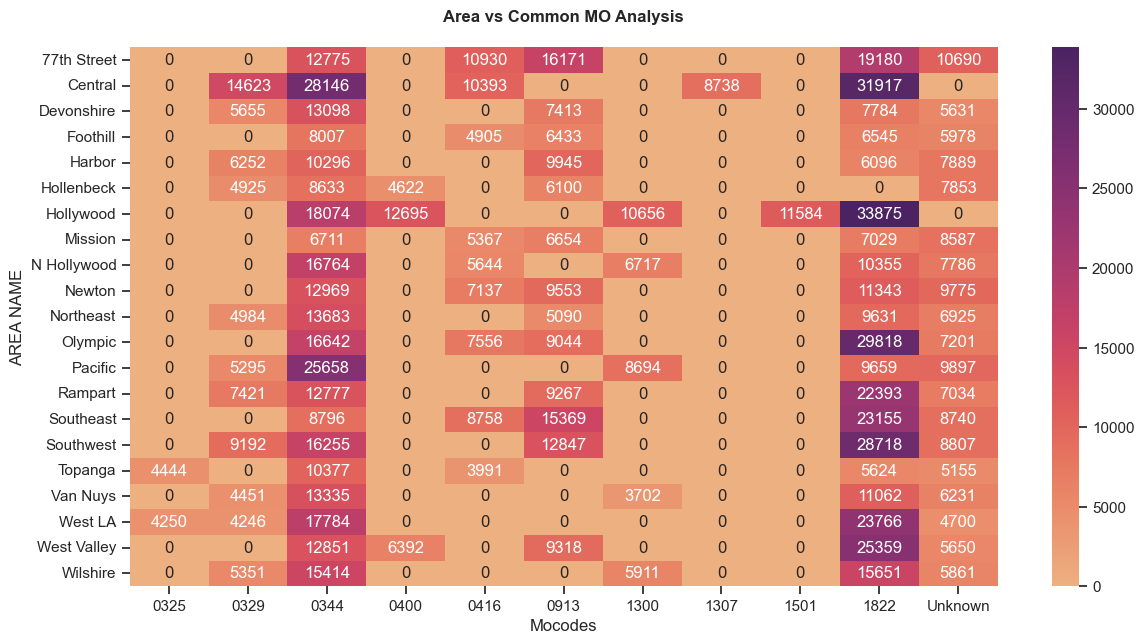

In [77]:
heatmap104=plot33.pivot_table(
    index='AREA NAME',
    columns='Mocodes',
    values='count',
    fill_value=0
)
plt.figure(figsize=(14,7))
ax=sns.heatmap(heatmap104,cmap='flare',annot=True,fmt='.0f')
plt.title('Area vs Common MO Analysis\n',weight='bold')

Percentage of Crimes Involving Weapon

In [78]:
df['Weapon Used Cd']=df['Weapon Used Cd'].astype(int)

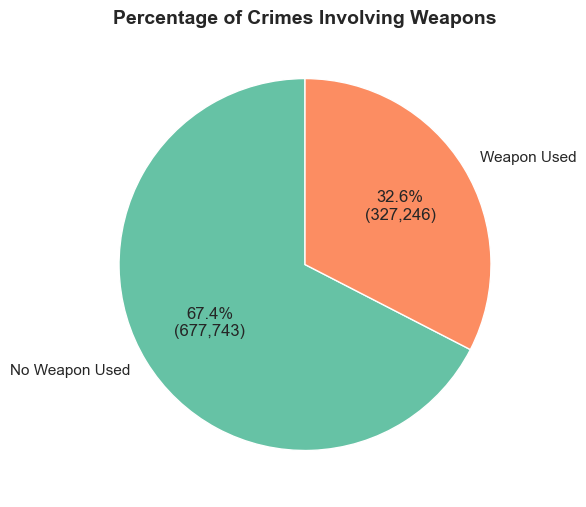

In [79]:
no_weapon = df[df['Weapon Used Cd'] == 0].shape[0]
total = df.shape[0]
weapon_used = total - no_weapon

labels = ['No Weapon Used', 'Weapon Used']
sizes = [no_weapon, weapon_used]
colors = sns.color_palette('Set2')

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100):,})',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Percentage of Crimes Involving Weapons', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Top Weapons Used by Crime Type

In [80]:
top5a=df['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(10).index
top5aa=df[df['Crm Cd Desc'].isin(top5a)]

In [81]:
plot34=(top5aa.groupby(['Crm Cd Desc','Weapon Used Cd'] ,observed=True)
        .size()
        .reset_index(name='count')
        .sort_values(['Crm Cd Desc','Weapon Used Cd'],ascending=[True,False])
        .groupby('Crm Cd Desc')
        .head()
        )
plot34

,Crm Cd Desc,Weapon Used Cd,count
76,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",516,31
75,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",515,5
74,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",514,50
73,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",513,155
72,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",512,2768
121,BATTERY - SIMPLE ASSAULT,516,6
120,BATTERY - SIMPLE ASSAULT,515,10
119,BATTERY - SIMPLE ASSAULT,513,3
118,BATTERY - SIMPLE ASSAULT,512,33
117,BATTERY - SIMPLE ASSAULT,511,181


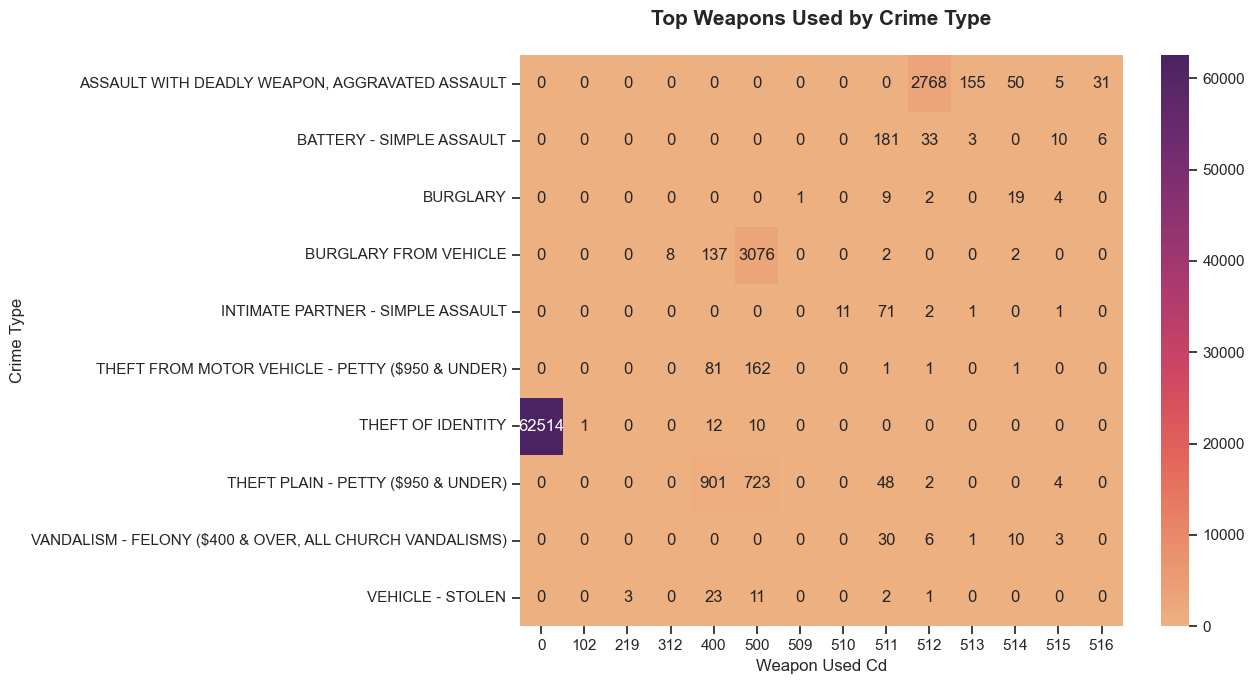

In [82]:
heatmap105=plot34.pivot_table(
    index='Crm Cd Desc',
    columns='Weapon Used Cd',
    values='count',
    fill_value=0
)
plt.figure(figsize=(13,7))
ax=sns.heatmap(heatmap105,cmap='flare',annot=True,fmt='.0f')
plt.ylabel('Crime Type')
plt.title('Top Weapons Used by Crime Type\n',weight='bold',fontsize=15)
plt.tight_layout()
plt.show()

Yearly Trend of Weapon-Related Crimes

In [83]:
plot35=(df.groupby(['occ_year','Weapon Used Cd'],observed=True)
        .size().
        reset_index(name='count')
        .sort_values(['occ_year','count'],ascending=[True,False])
        .groupby('occ_year').head()
        )
plot35

,occ_year,Weapon Used Cd,count
0,2020,0,126868
60,2020,400,39530
61,2020,500,7899
72,2020,511,5221
2,2020,102,3957
78,2021,0,135936
135,2021,400,39495
136,2021,500,7310
147,2021,511,5278
80,2021,102,4940


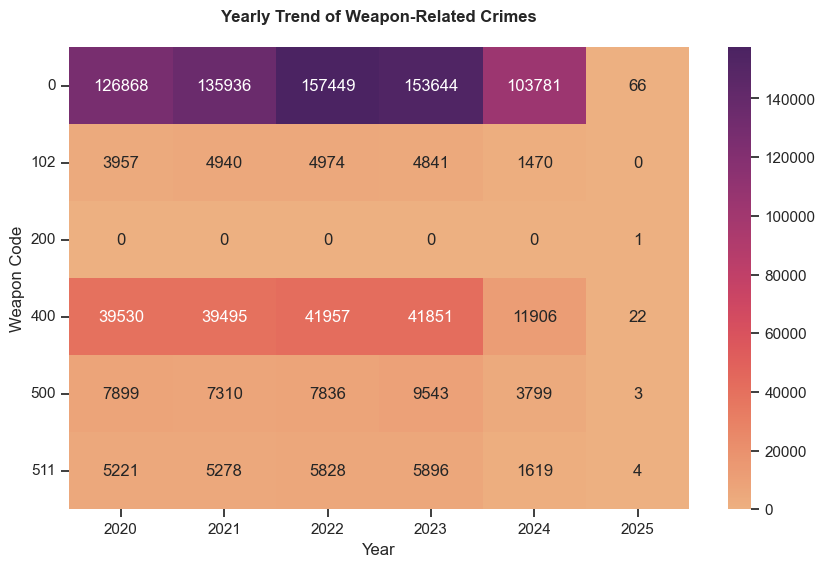

In [84]:
heatmap106=plot35.pivot_table(
    index='Weapon Used Cd',
    columns='occ_year',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,6))
ax=sns.heatmap(heatmap106,cmap='flare',annot=True,fmt='.0f')
plt.xlabel('Year')
plt.ylabel('Weapon Code')
plt.title('Yearly Trend of Weapon-Related Crimes\n',weight='bold')
ax.tick_params(rotation=0)

Crime Status Distribution

In [85]:
plot36=df.groupby('Status Desc').size().sort_values(ascending=True).reset_index(name='count')
plot36

,Status Desc,count
0,UNK,7
1,Juv Other,1879
2,Juv Arrest,3286
3,Adult Arrest,87155
4,Adult Other,109802
5,Invest Cont,802862


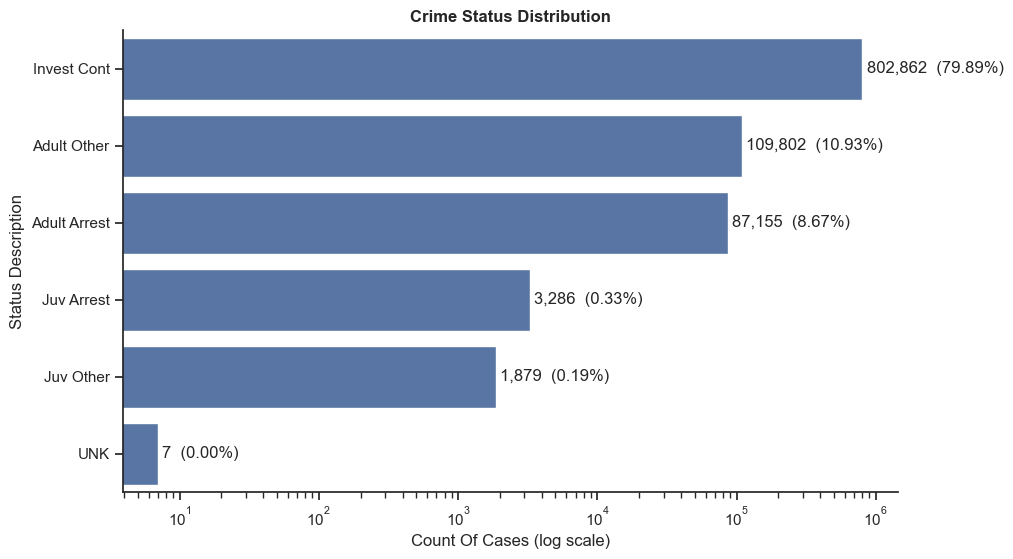

In [86]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot36, x='count', y='Status Desc')
ax.invert_yaxis()
plt.xscale('log')

total = plot36['count'].sum()
for i in ax.containers:
    labels = [f"{v.get_width():,.0f}  ({v.get_width()/total*100:.2f}%)" for v in i]
    ax.bar_label(i, labels=labels, padding=3)

plt.xlabel('Count Of Cases (log scale)')
plt.ylabel('Status Description')
plt.title('Crime Status Distribution',weight='bold')
sns.despine()
plt.show()

Cleared vs Pending Cases by Crime Type

In [87]:
top10=df['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(10).index
top10aa=df[df['Crm Cd Desc'].isin(top10)]

plot37=(top10aa.groupby(['Crm Cd Desc','Status Desc'])
    .size().reset_index(name='count')
    .sort_values(['Crm Cd Desc','count'],ascending=[True,False])
    .groupby('Crm Cd Desc')
    .head()
    )
plot37

,Crm Cd Desc,Status Desc,count
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Invest Cont,32261
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Adult Arrest,11686
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Adult Other,8928
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Juv Arrest,567
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Juv Other,83
7,BATTERY - SIMPLE ASSAULT,Invest Cont,49785
6,BATTERY - SIMPLE ASSAULT,Adult Other,19434
5,BATTERY - SIMPLE ASSAULT,Adult Arrest,4576
9,BATTERY - SIMPLE ASSAULT,Juv Other,668
8,BATTERY - SIMPLE ASSAULT,Juv Arrest,376


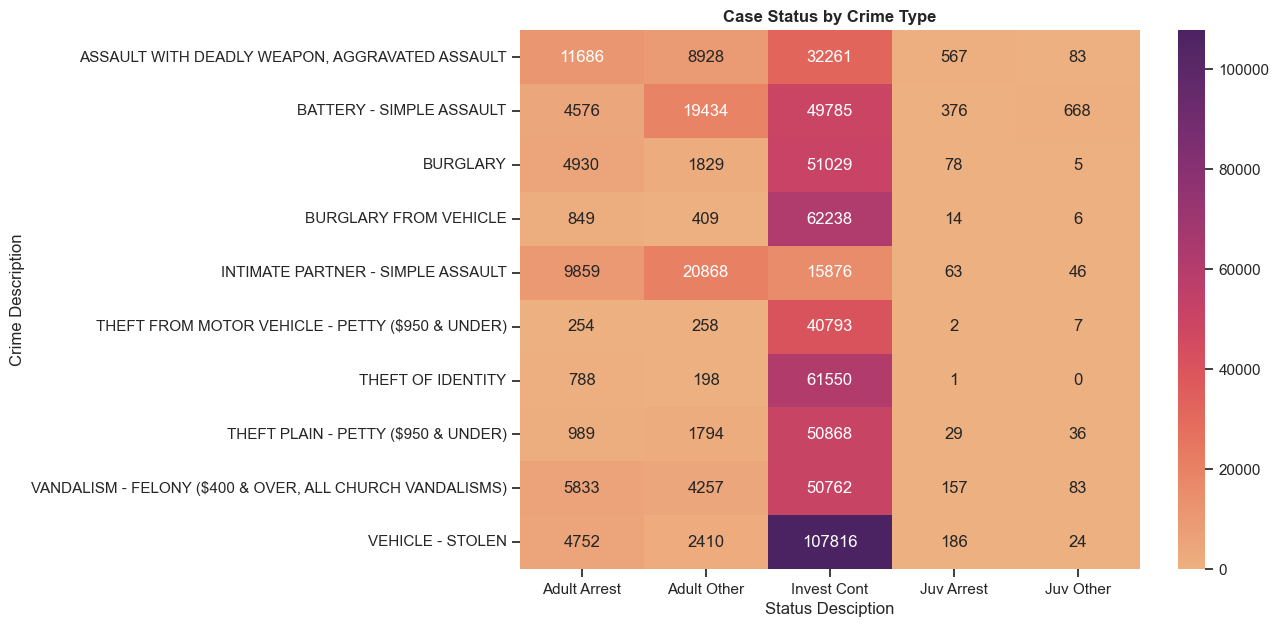

In [88]:
heatmap107=plot37.pivot_table(
    index='Crm Cd Desc',
    columns='Status Desc',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,7))
sns.heatmap(heatmap107,cmap='flare',annot=True,fmt='.0f')
plt.title('Case Status by Crime Type',weight='bold')
plt.xlabel('Status Desciption')
plt.ylabel('Crime Description')

plt.show()

Relationship Between Weapon Usage and Case Status

In [89]:
plot38=(
    df.groupby(['Status Desc', 'Weapon Used Cd'], observed=True)
      .size()
      .reset_index(name='count')
      .sort_values(['Status Desc', 'count'], ascending=[True, False])
      .groupby('Status Desc')
      .head(5)    
)
plot38

,Status Desc,Weapon Used Cd,count
0,Adult Arrest,0,33092
59,Adult Arrest,400,25957
60,Adult Arrest,500,4747
71,Adult Arrest,511,4487
2,Adult Arrest,102,3371
134,Adult Other,400,51465
77,Adult Other,0,31363
146,Adult Other,511,6691
135,Adult Other,500,5653
79,Adult Other,102,2214


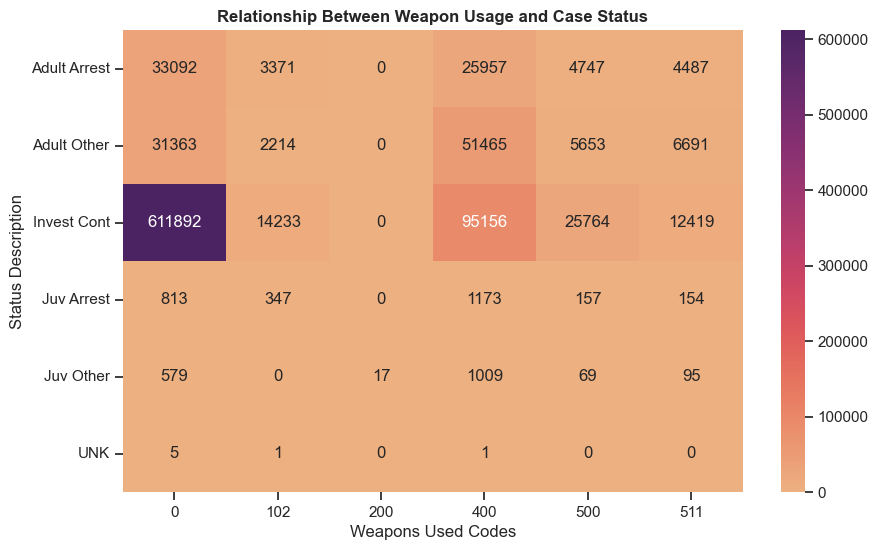

In [90]:
heatmap108=plot38.pivot_table(
    index='Status Desc',
    columns='Weapon Used Cd',
    values='count',
    fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap108,cmap='flare',annot=True,fmt='.0f')
plt.ylabel('Status Description')
plt.xlabel('Weapons Used Codes')
plt.title('Relationship Between Weapon Usage and Case Status',weight='bold')
plt.show()